In [1]:
# importing libraries
import numpy as np
import pandas as pd
import math

from datetime import datetime

# importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# importing libraries for model building
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Train dataset
train = pd.read_csv('train.csv')
train.shape

(1460, 81)

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Describe function on numerical columns
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### <font color=red>Observation -</font>
    Following fields have missing values - 
    1. LotFrontage
    2. MasVnrArea
    3. GarageYrBlt
    
    We notice year and month columns are treated numerical which should be categorical ideally, we will change datatypes of the same.

### <font color=red>Observation -</font>
    We see few features have 1% variance that is they have single value with 99% frequency, adding up very less information and can be removed.

In [5]:
# Dropping variables having less than 1% variance
var_drop = pd.DataFrame(train.describe(include='O').transpose())
var_drop_col = list(var_drop[var_drop['freq']>len(train)*0.99].index)

In [6]:
# columns to drop with less than 1% variance
var_drop_col

['Street', 'Utilities']

In [7]:
# dropping columns with less than 1% variance
train.drop(var_drop_col, axis = 1, inplace=True)
train.shape

(1460, 79)

### <font color=red>=========================================================================================</font>

In [8]:
# Check ID column

In [9]:
print("Number of unique values in ID : ", train['Id'].nunique())
train['Id'].describe()

Number of unique values in ID :  1460


count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64

### <font color=Red>Observation -</font>
    Id column has all unique values, with minimum as 1 and maximum as 1460 incrementing with 1 for each record. Hence this column can be dropped.

In [10]:
# Dropping ID columns
train.drop('Id', axis=1, inplace=True)

In [11]:
train.shape

(1460, 78)

### <font color=red>=========================================================================================</font>

### Deriving new features

In [12]:
# Creating variable "PropAge" based on "YearBuilt", age from current year
train['PropAge'] = train['YearBuilt'].apply(lambda x : datetime.now().year - x)
train['PropAge'].describe()

count    1460.000000
mean       47.732192
std        30.202904
min         9.000000
25%        19.000000
50%        46.000000
75%        65.000000
max       147.000000
Name: PropAge, dtype: float64

In [13]:
# Dropping 'YearBuilt' column
train.drop('YearBuilt', axis = 1, inplace = True)

In [14]:
# Creating variable "RemodAge" based on "YearRemodAdd", age from current year
train['RemodAge'] = train['YearRemodAdd'].apply(lambda x : datetime.now().year - x)
train['RemodAge'].describe()

count    1460.000000
mean       34.134247
std        20.645407
min         9.000000
25%        15.000000
50%        25.000000
75%        52.000000
max        69.000000
Name: RemodAge, dtype: float64

In [15]:
# Dropping 'YearRemodAdd' column
train.drop('YearRemodAdd', axis = 1, inplace = True)

In [16]:
# Creating variable "GarageAge" based on "GarageYrBlt", age from current year
train['GarageAge'] = train['GarageYrBlt'].apply(lambda x : datetime.now().year - x)
train['GarageAge'].describe()

count    1379.000000
mean       40.493836
std        24.689725
min         9.000000
25%        17.000000
50%        39.000000
75%        58.000000
max       119.000000
Name: GarageAge, dtype: float64

In [17]:
# Dropping 'GarageYrBlt' column
train.drop('GarageYrBlt', axis = 1, inplace = True)

In [18]:
# Creating variable "SoldAge" based on "YrSold", age from current year
train['SoldAge'] = train['YrSold'].apply(lambda x : datetime.now().year - x)
train['SoldAge'].describe()

count    1460.000000
mean       11.184247
std         1.328095
min         9.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        13.000000
Name: SoldAge, dtype: float64

In [19]:
# Dropping 'YrSold' column
train.drop('YrSold', axis = 1, inplace = True)

In [20]:
# Converting year and month column to categorical datatype
train['MoSold'] = train['MoSold'].astype('object')
train['MoSold'].dtypes

dtype('O')

### <font color=red>=========================================================================================</font>

### NULL value analysis

In [21]:
# Null values analysis
df_null = train.isna().sum(axis = 0)/len(train)*100
df_null = df_null[df_null>0]
df_null.sort_values(inplace=True, ascending = False)
df_null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageAge        5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### <font color=red>Observation -</font>
    Total 19 features have NULL values
    We can drop features which have more than 50% NULL values

In [22]:
train.drop(list(df_null[df_null>50].index), axis=1, inplace = True)
train.shape

(1460, 74)

#### Imputing NULL values for rest columns
    FireplaceQu
    LotFrontage
    GarageYrBlt
    GarageType
    GarageFinish
    GarageQual
    GarageCond
    BsmtFinType2
    BsmtExposure
    BsmtFinType1
    BsmtCond
    BsmtQual
    MasVnrArea
    MasVnrType
    Electrical

##### => NULL value analysis of column "FireplaceQu"
    This column details quality of fire place which can have following values
       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
    For records which have this column as NULL we will analyse value in column "Fireplaces" which refers to number of fireplace in house.

In [23]:
# NULL value analysis for column "FireplaceQu"
train[train['FireplaceQu'].isnull()]['Fireplaces'].value_counts()

0    690
Name: Fireplaces, dtype: int64

### <font color=Red>Observation -</font>
    We observe records having NULL value for "FireplaceQu" have value 0 for "Fireplaces", so we can replace NULL with "NA"  which states No Fireplace

In [24]:
# imputing NULL values for column "FireplaceQu"
train['FireplaceQu'] = train['FireplaceQu'].replace(np.nan,'NA')
train['FireplaceQu'].isna().sum(axis=0)

0

### <font color=red>=========================================================================================</font>

##### => NULL value analysis of column "LotFrontage"
    This column details Linear feet of street connected to property

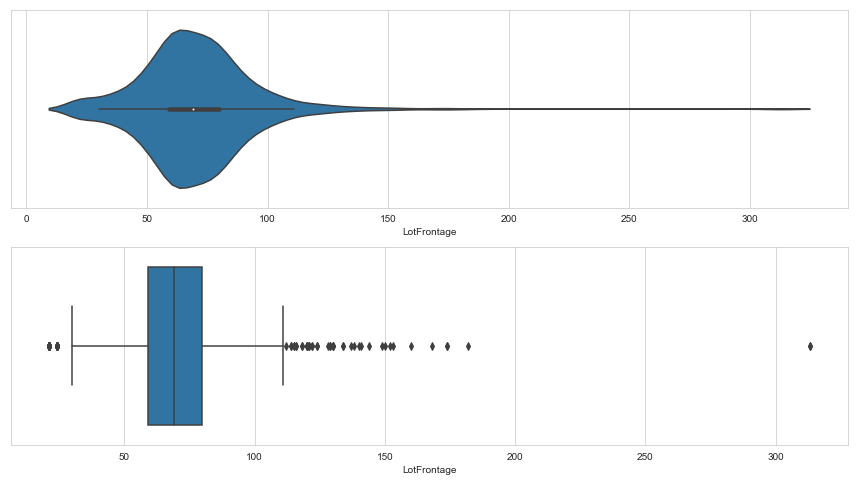

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
5%         34.000000
25%        59.000000
50%        69.000000
75%        80.000000
80%        85.000000
85%        90.000000
90%        96.000000
95%       107.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [25]:
# Plotting violin plot and box plot to see spreadand density of column
plt.figure(figsize=(15,8))
plt.subplot(211)
sns.violinplot(x='LotFrontage', data = train, split=True)
plt.subplot(212)
sns.boxplot(x='LotFrontage', data = train)
plt.show()

train['LotFrontage'].describe(percentiles=[0.05,.25, .5, .75, .80, .85, .90, .95, .99])

### <font color=red>Observation -</font>
    This is a continuos variable with mean and median value almost aligning.
    It will safe if we impute missing values with mean of the column.

In [26]:
# imputing NULL values for column "LotFrontage"
train['LotFrontage'] = train['LotFrontage'].replace(np.nan,train['LotFrontage'].mean())
train['LotFrontage'].isna().sum(axis=0)

0

### <font color=red>=========================================================================================</font>

##### => NULL value analysis of column "GarageYrBlt", "GarageType", "GarageFinish", "GarageQual", 'GarageCond"
    These all columns deals with Garage details so we can analyse them together.
    First lets check whether for same records do they have missing value. After that we will analyse value of "GarageCars"  and "GarageArea" which will help in imputing NULL values.

In [27]:
# NULL value analysis for column "GarageAge","GarageType", "GarageFinish", "GarageQual", 'GarageCond"
print(train[["GarageAge", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]].isnull().sum(axis=0))
print(train[["GarageAge", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]].isnull().sum(axis=1).value_counts())

GarageAge       81
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64
0    1379
5      81
dtype: int64


### <font color=red>Observation -</font>
    We can see for same record columns "GarageType", "GarageFinish", "GarageQual", "GarageCond" have NULL values

In [28]:
# Checking value in GarageArea for NULL values in "GarageYrBlt", "GarageType", "GarageFinish", "GarageQual", "GarageCond"
print("Value of GarageArea : ",train[train[["GarageAge", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]].isnull().sum(axis=1)==5]['GarageArea'].value_counts())

# Checking value in GarageCars for NULL values in "GarageYrBlt", "GarageType", "GarageFinish", "GarageQual", "GarageCond"
print("Value of GarageArea : ",train[train[["GarageAge", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]].isnull().sum(axis=1)==5]['GarageCars'].value_counts())

Value of GarageArea :  0    81
Name: GarageArea, dtype: int64
Value of GarageArea :  0    81
Name: GarageCars, dtype: int64


### <font color=red>Observation -</font>
    We see for same record where columns "GarageAge", "GarageType", "GarageFinish", "GarageQual", "GarageCond" have NULL values, columns GarageArea and GarageCars have 0. Hence we can safely infer these records corresponds to No Garage and all these columns we can safely impute "NA" which stands for No Garage and 0 for "GarageAge"

In [29]:
# imputing NULL values for column "GarageType", "GarageFinish", "GarageQual", "GarageCond"
"GarageAge", 
train['GarageAge'] = train['GarageAge'].replace(np.nan,0)
train['GarageType'] = train['GarageType'].replace(np.nan,'NA')
train['GarageFinish'] = train['GarageFinish'].replace(np.nan,'NA')
train['GarageQual'] = train['GarageQual'].replace(np.nan,'NA')
train['GarageCond'] = train['GarageCond'].replace(np.nan,'NA')
train[["GarageAge", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]].isnull().sum(axis=0)

GarageAge       0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

### <font color=red>=========================================================================================</font>

##### => NULL value analysis of column 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
    These all columns deals with Basement so we can analyse them together.
    First lets check whether for same records do they have missing value. After that we will analyse value of "TotalBsmtSF" which provides area of basement and will help in imputing NULL values.

In [30]:
# NULL value analysis for column 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
print(train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isnull().sum(axis=0))
print(train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isnull().sum(axis=1).value_counts())

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64
0    1421
5      37
1       2
dtype: int64


### <font color=red>Observation -</font>
    We can see for 37 records have columns 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2' with NULL values, while only 2 records have columns "BsmtExposure" or "BsmtFinType2" as NULL values.
    We will first resolve 37 records and than remains 2 records.

In [31]:
# Checking value in TotalBsmtSF for NULL values in 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
train[train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isnull().sum(axis=1)==5]['TotalBsmtSF'].value_counts()

0    37
Name: TotalBsmtSF, dtype: int64

### <font color=red>Observation -</font>
    We see for same record where columns 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2' have NULL values, columns "TotalBsmtSF has 0. Hence we can safely infer these records corresponds to No Basement and all these columns we can safely impute "NA" which stands for No Basement

##### Now lets check two records for which BsmtExposure and BsmtFinType2 are NULL, we will check other basement attributes

In [32]:
# Checking value in TotalBsmtSF for NULL values in 'BsmtExposure','BsmtFinType2'
train[train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isnull().sum(axis=1)==1][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF
332,Gd,TA,No,GLQ,NaN,479,3206
948,Gd,TA,NaN,Unf,Unf,0,936


### <font color=red>Observation -</font>
    For record 332 where we have only "BsmtFinType2" as NULL while we have value for "BsmtFinSF2", we will fill it with average value which is "Rec" means average rec room
    For record 948 where we have only "BsmtExposure" as NULL while other basement attributes have value, we will fill it with average value which is "Av" means average exposure

In [33]:
# imputing NULL values for two records
train.loc[332,'BsmtFinType2'] = 'Rec'
train.loc[948,'BsmtExposure'] = 'Av'
train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isnull().sum(axis=0)

BsmtQual        37
BsmtCond        37
BsmtExposure    37
BsmtFinType1    37
BsmtFinType2    37
dtype: int64

In [34]:
# imputing NULL values for rest of the records with column "GarageYrBlt", "GarageType", "GarageFinish", "GarageQual", "GarageCond" having NULL values
train['BsmtQual'] = train['BsmtQual'].replace(np.nan,'NA')
train['BsmtCond'] = train['BsmtCond'].replace(np.nan,'NA')
train['BsmtExposure'] = train['BsmtExposure'].replace(np.nan,'NA')
train['BsmtFinType1'] = train['BsmtFinType1'].replace(np.nan,'NA')
train['BsmtFinType2'] = train['BsmtFinType2'].replace(np.nan,'NA')
train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isnull().sum(axis=0)

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

### <font color=red>=========================================================================================</font>

##### => NULL value analysis of column 'MasVnrArea', 'MasVnrType'
    Both of these columns deals with Masonry veneer so we can analyse them together.
    First lets check whether for same records do they have missing value. After that we will analyse value of "Exterior1st"  and "Exterior2nd" which defines type of exterior covering on house and will help in imputing NULL values.

In [35]:
# NULL value analysis for column 'MasVnrArea','MasVnrType'
print(train[['MasVnrArea','MasVnrType']].isnull().sum(axis=0))
print(train[['MasVnrArea','MasVnrType']].isnull().sum(axis=1).value_counts())

MasVnrArea    8
MasVnrType    8
dtype: int64
0    1452
2       8
dtype: int64


### <font color=red>Observation -</font>
    We can see for same record columns 'MasVnrArea','MasVnrType' have NULL values

In [36]:
# Checking value in 'Exterior1st','Exterior2nd' for NULL values in 'MasVnrArea','MasVnrType'
print("Value of Exterior1st : ",train[train[['MasVnrArea','MasVnrType']].isnull().sum(axis=1)==2]['Exterior1st'].value_counts())
print("Value of Exterior2nd : ",train[train[['MasVnrArea','MasVnrType']].isnull().sum(axis=1)==2]['Exterior2nd'].value_counts())

Value of Exterior1st :  VinylSd    5
CemntBd    2
Wd Sdng    1
Name: Exterior1st, dtype: int64
Value of Exterior2nd :  VinylSd    5
CmentBd    2
Stone      1
Name: Exterior2nd, dtype: int64


### <font color=red>Observation -</font>
    'MasVnrType' can have values from the following
        BrkCmn	Brick Common
        BrkFace	Brick Face
        CBlock	Cinder Block
        None	None
        Stone	Stone
     Since 'Exterior1st','Exterior2nd' has either of the values "VinylSd", "CemntBd", "Wd Sdng", hence we can safely impute "None" for 'MasVnrType' and 0 for 'MasVnrArea'

In [37]:
# imputing NULL values for column 'MasVnrArea','MasVnrType' having NULL values
train['MasVnrArea'] = train['MasVnrArea'].replace(np.nan,0)
train['MasVnrType'] = train['MasVnrType'].replace(np.nan,'None')
train[['MasVnrArea','MasVnrType']].isnull().sum(axis=0)

MasVnrArea    0
MasVnrType    0
dtype: int64

### <font color=red>=========================================================================================</font>

##### => NULL value analysis of column "Electrical"
    This column details type of electrical system available at property

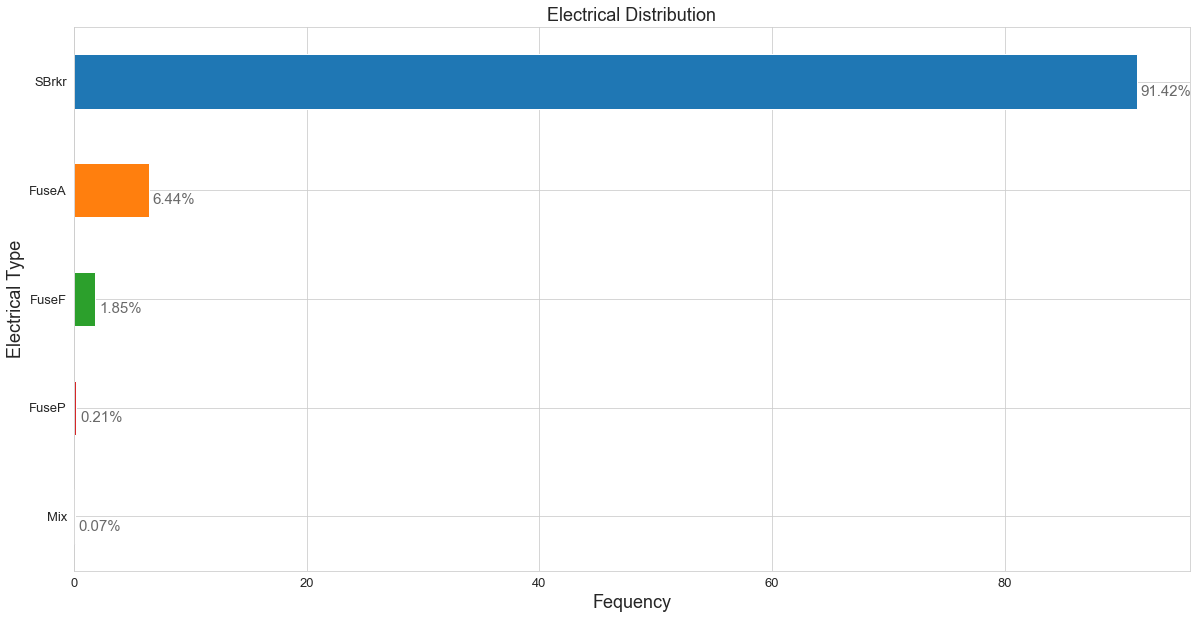

In [38]:
ax = (train['Electrical'].value_counts()/len(train)*100).round(2).plot(kind='barh', figsize=(20,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Electrical Distribution", fontsize=18)
ax.set_xlabel("Fequency", fontsize=18)
ax.set_ylabel("Electrical Type", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

### <font color=red>Observation -</font>
    From distribution above we can see more than 90% property have value "SBrkr" which means Standard Circuit Breakers & Romex and also a default value, hence we will impute NULL values for "Electrical" with "SBrkr"

In [39]:
# imputing NULL values for column 'Electrical'
train['Electrical'] = train['Electrical'].replace(np.nan,'SBrkr')
train[['Electrical']].isnull().sum(axis=0)

Electrical    0
dtype: int64

### <font color=red>=========================================================================================</font>

In [40]:
#Checking whether there are any more colums with NULL values.
train.isnull().sum().value_counts()

0    74
dtype: int64

##### None of the columns have NULL values now
### NULL Values handled
### <font color=red>=========================================================================================</font>

### SalePrice analysis

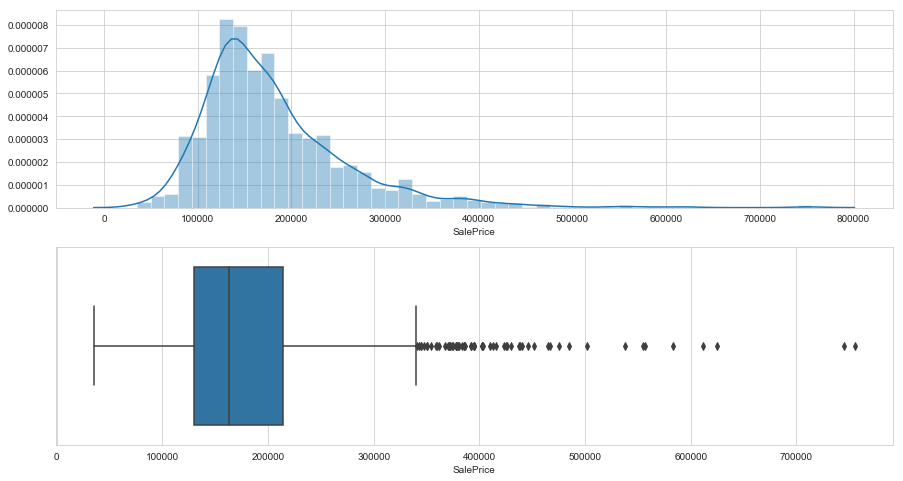

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
5%        88000.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
80%      230000.000000
85%      250000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

In [41]:
# Plotting distribution plot and box plot to see spread and density of SalePrice
plt.figure(figsize=(15,8))
plt.subplot(211)
sns.distplot(train['SalePrice'])
plt.subplot(212)
sns.boxplot(x='SalePrice', data = train)
plt.show()

train['SalePrice'].describe(percentiles=[0.05,.25, .5, .75, .80, .85, .90, .95, .99])

### <font color=red>Observation -</font>
    From above we can notice SalePrice distribution is not normal but it is right skewed. We also observe few outliers above 500000
### <font color=red>=========================================================================================</font>

### Correlation of target variable(SalePrice) with other variables

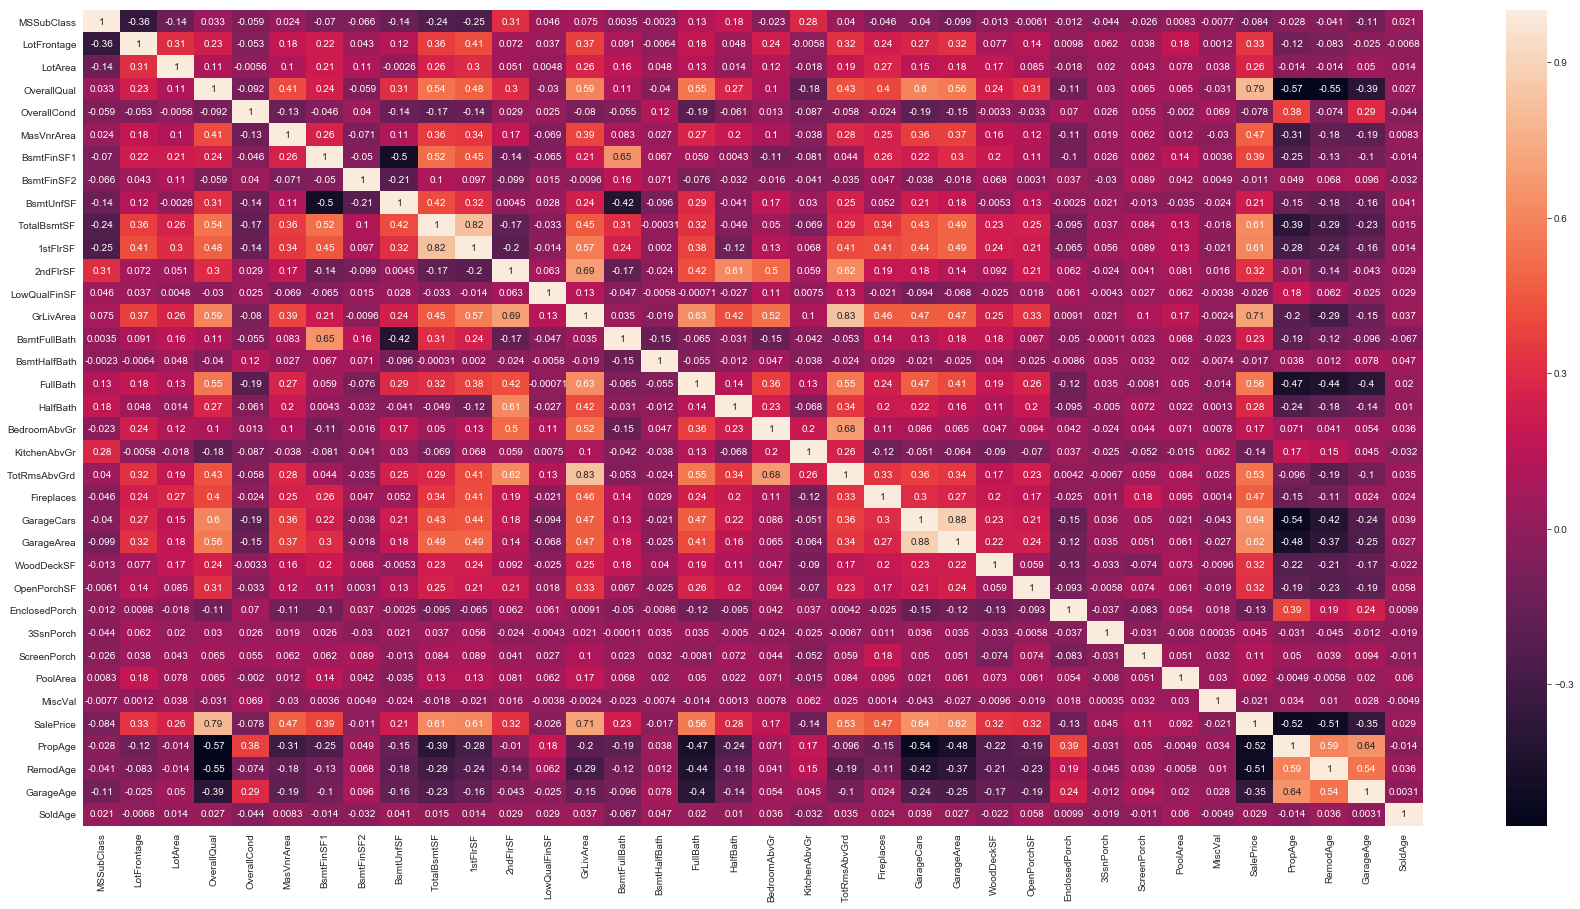

In [42]:
plt.figure(figsize=(30,15))
sns.heatmap(train.corr(), annot=True)
plt.show()

### <font color=red>Observation -</font>
    We observe following pairs have corelation of more more 0.8
    TotalBsmtSF, 1stFlrSF - 0.82
    TotRmsAbvGrd, GrLivArea - 0.83
    GarageArea, GarageCars - 0.88
    GarageAge, PropAge - 0.83
    
    Target Variable SalePrice is most correlated with OverallQual with correlation coefficient of 0.79
### <font color=red>=========================================================================================</font>

### Scatter plot of numerical variables with target variable (SalesPrice)

In [43]:
# Selecting only numeric columns
col_num = list(train.select_dtypes(exclude='object').columns)
col_num.remove('SalePrice')
print("Number of numerical columns : ", len(col_num))
col_num

Number of numerical columns :  35


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'PropAge',
 'RemodAge',
 'GarageAge',
 'SoldAge']

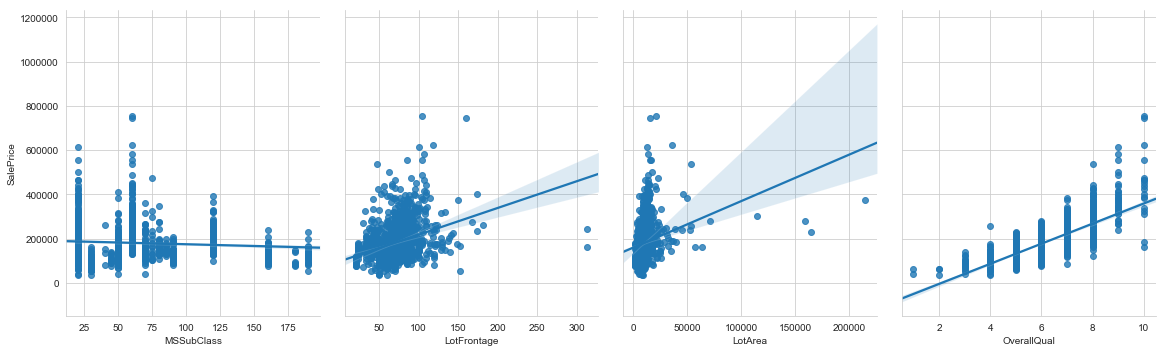

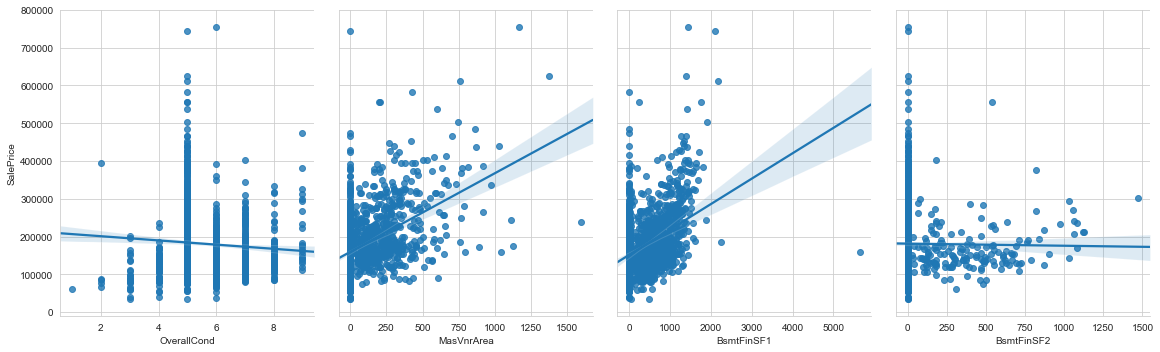

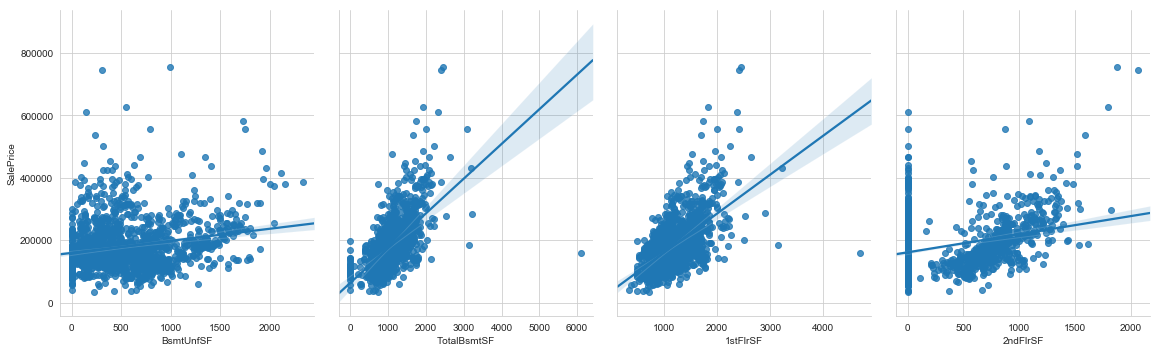

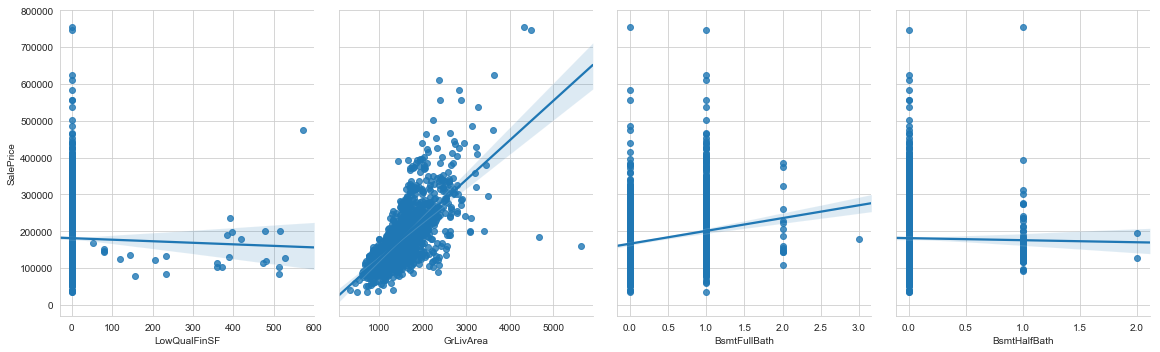

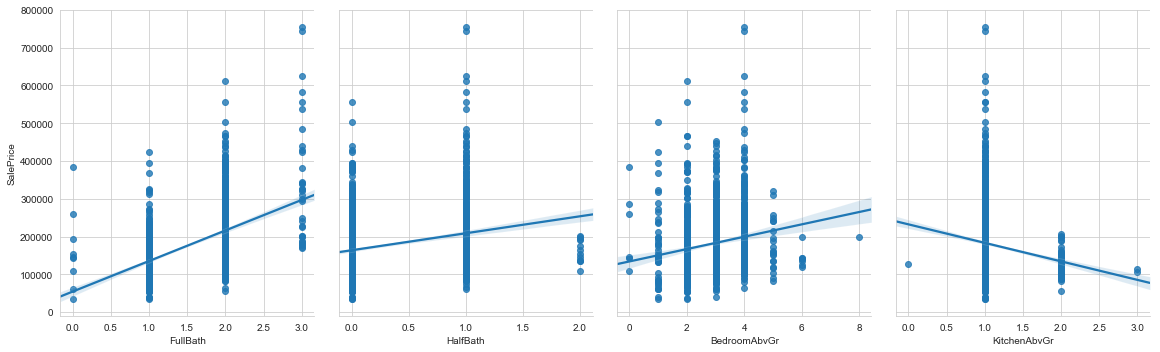

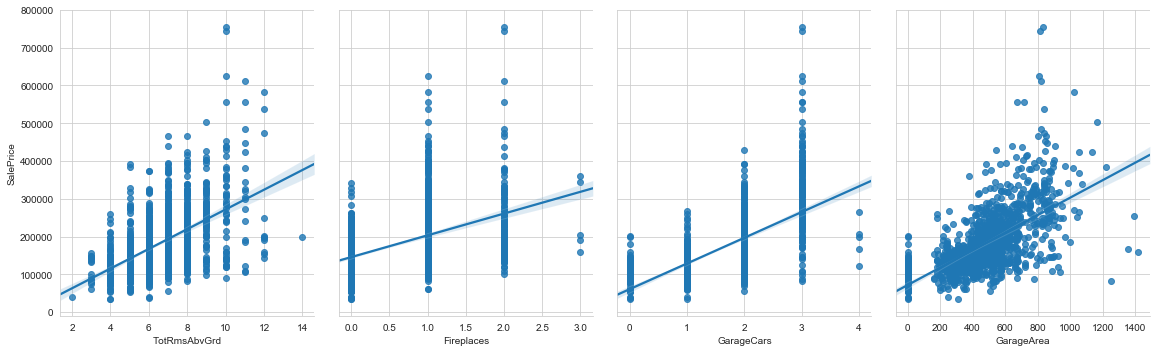

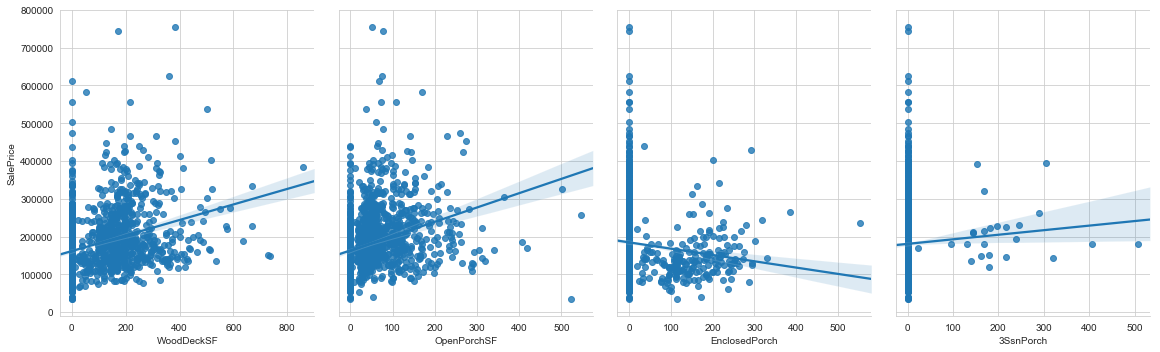

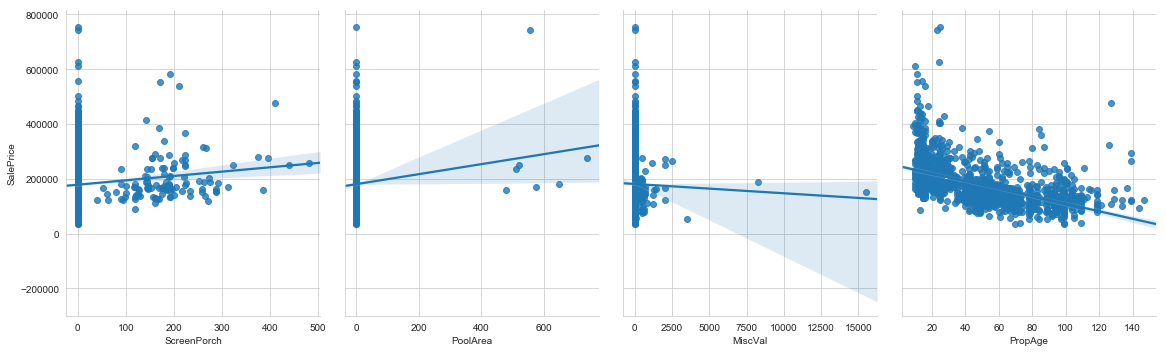

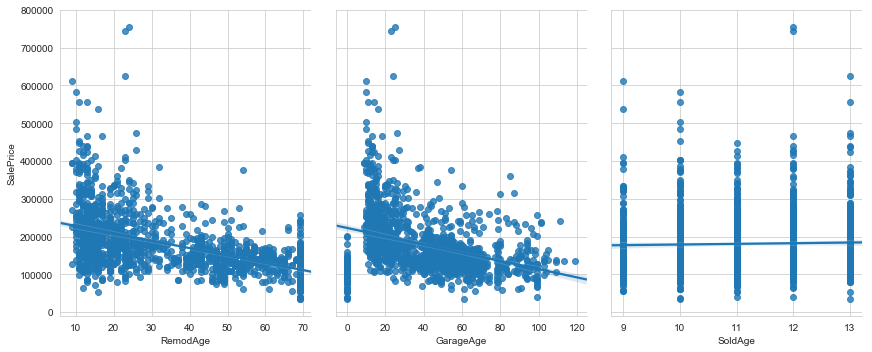

In [44]:
for i in range(0,len(col_num)+1,4):
    if(i+4 > len(col_num)):
        col = col_num[i:len(col_num)]
    else:
        col = col_num[i:i+4]
    sns.pairplot(train, x_vars=col, y_vars=["SalePrice"], height=5, aspect=.8, kind="reg")
    plt.show()

### <font color=red>Observation -</font>
    SalePrice has positive correlation with
    OverallQUal
    BsmtUnfSF
    TotalBsmtSF
    1stFlrSF
    2ndFlrSF
    GrLivArea
    FullBath
    BedroomAbvGr
    TotRmsAbvGrd
    Fireplaces
    GarageCars
    GarageArea

    SalePrice has negative correlation with
    PropAge
    RemodAge
    GarageAge
    
#### Outliers Observation
    TotalBsmtSF>6000 & SalePrice<200000
    1stFlrSF>4000 & SalePrice<200000
    GrLivArea>4000 & SalePrice<20000
    GarageArea>1200 & SalePrice<200000
    GarageArea between (750~850) & SalePrice>600000
    
    We will delete these records to remove impact of outlier

##### Deleting records with 
    TotalBsmtSF>6000 & SalePrice<200000
    1stFlrSF>4000 & SalePrice<200000
    GrLivArea>4000 & SalePrice<20000
    GarageArea>1200 & SalePrice<200000


In [45]:
# records to drop
train[(train['SalePrice']<200000) & ((train['1stFlrSF']>4000) | (train['GrLivArea']>4000) | (train['GarageArea']>1200))][['SalePrice','1stFlrSF','GrLivArea','GarageArea']]

,SalePrice,1stFlrSF,GrLivArea,GarageArea
523,184750,3138,4676,884
1061,81000,894,894,1248
1190,168000,1622,1622,1356
1298,160000,4692,5642,1418


In [46]:
# dropping records
train.drop(train[(train['SalePrice']<200000) & ((train['1stFlrSF']>4000) | (train['GrLivArea']>4000) | (train['GarageArea']>1200))].index, inplace=True)
train.shape

(1456, 74)

##### Deleting records with 
    GarageArea between (750~850) & SalePrice>600000

In [47]:
# records to drop
train[train['SalePrice']>600000][['SalePrice','GarageArea']]

,SalePrice,GarageArea
691,755000,832
898,611657,820
1169,625000,807
1182,745000,813


In [48]:
# dropping records
train.drop(train[train['SalePrice']>600000][['SalePrice','GarageArea']].index, inplace=True)
train.shape

(1452, 74)

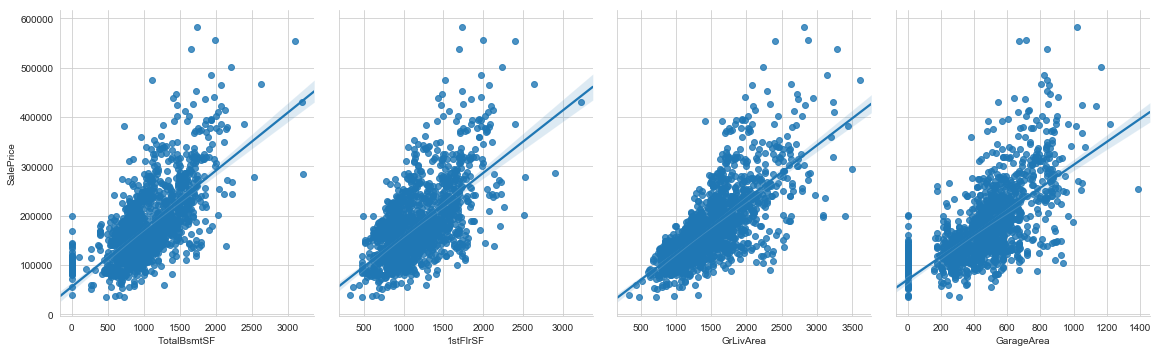

In [49]:
# plotting again to check n outliers
col = ['TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']
sns.pairplot(train, x_vars=col, y_vars=["SalePrice"], height=5, aspect=.8, kind="reg")
plt.show()

### Outlier Treated
### <font color=red>=========================================================================================</font>

### Box plot of categorical variables with target variable (SalesPrice)

In [50]:
# Selecting only categorical columns
col_cat = list(train.select_dtypes(include='object').columns)
print("Number of categorical columns : ", len(col_cat))
col_cat

Number of categorical columns :  38


['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'SaleType',
 'SaleCondition']

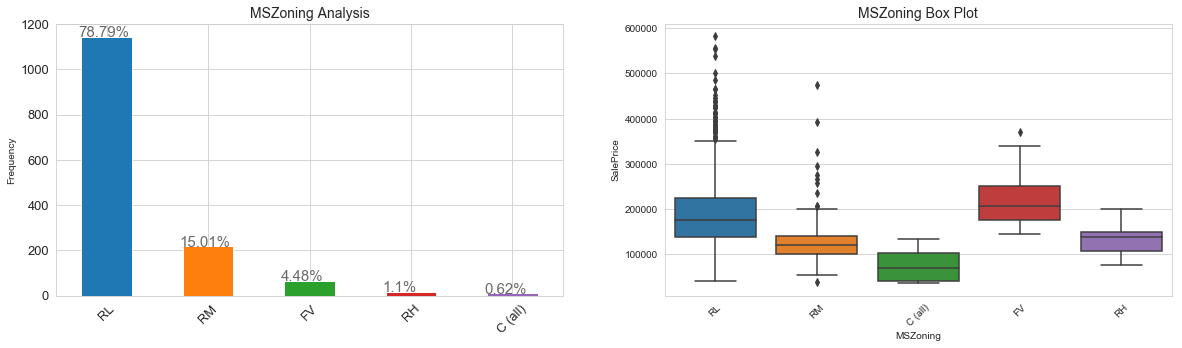

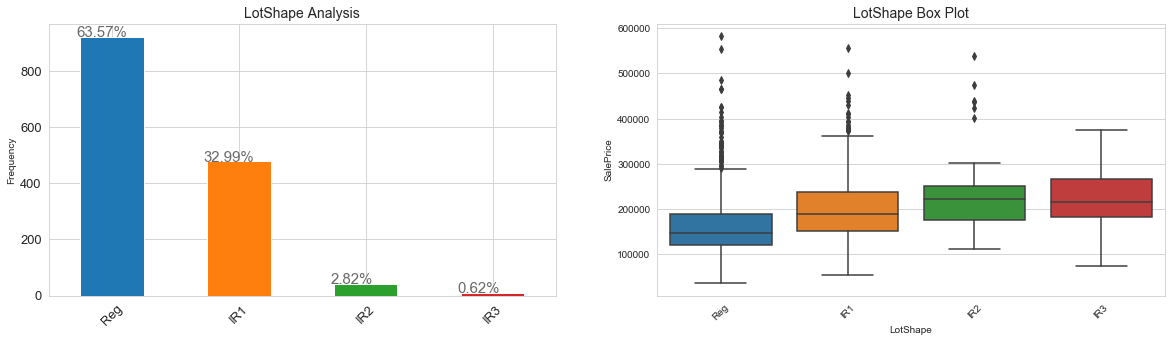

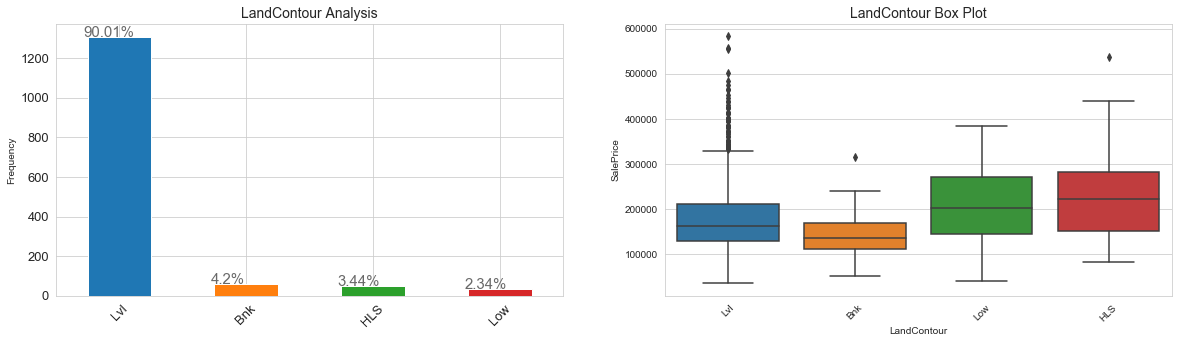

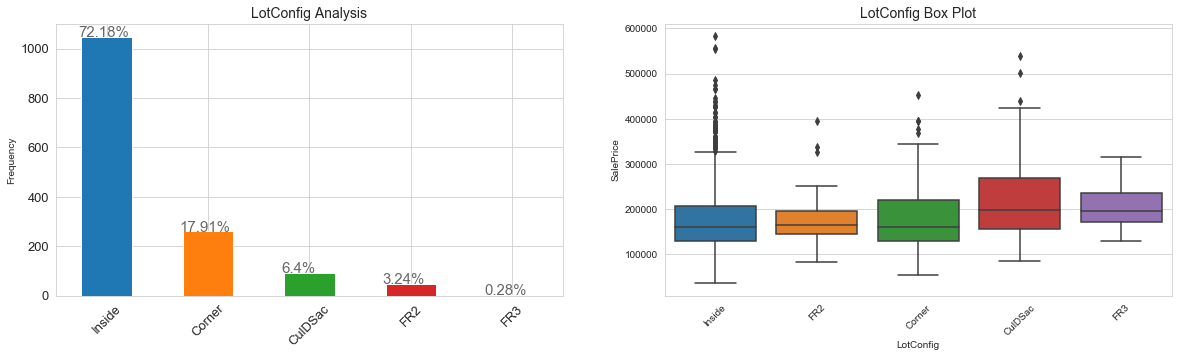

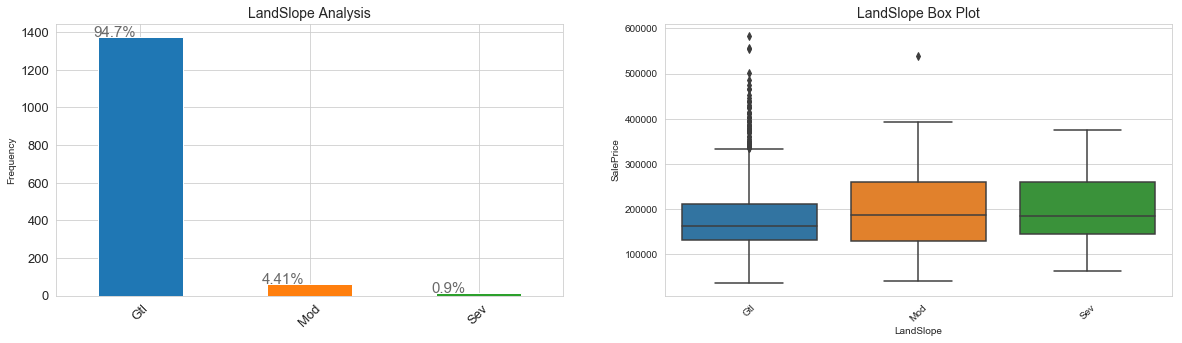

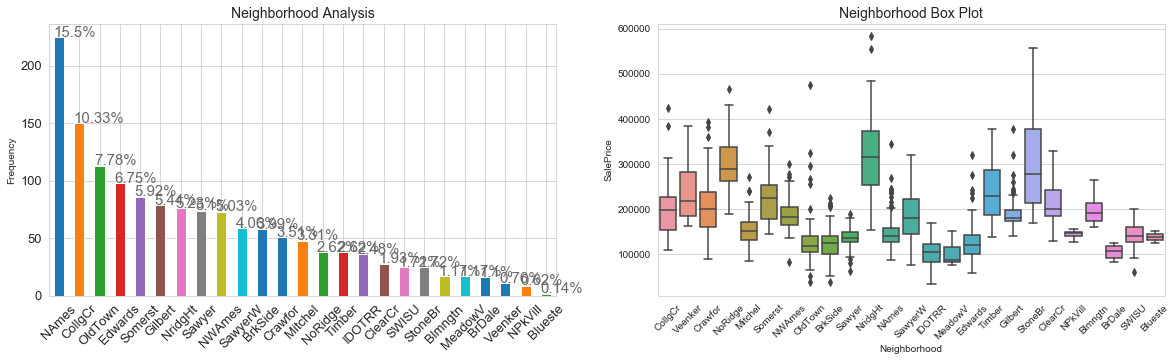

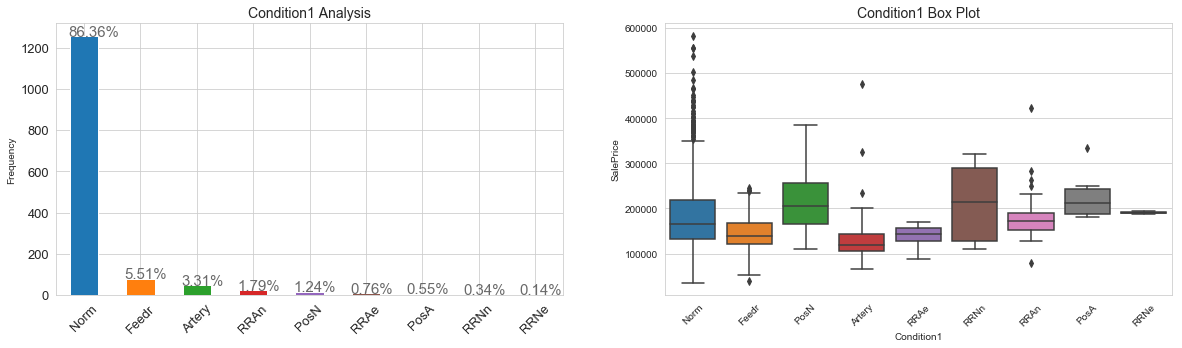

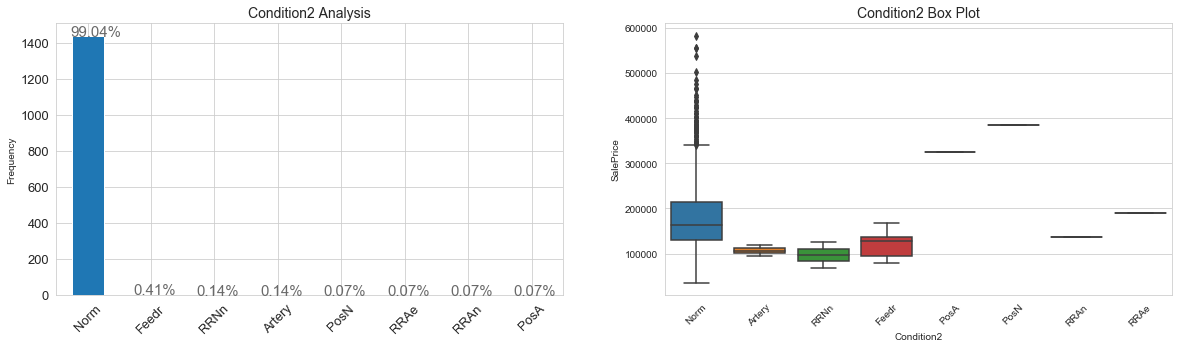

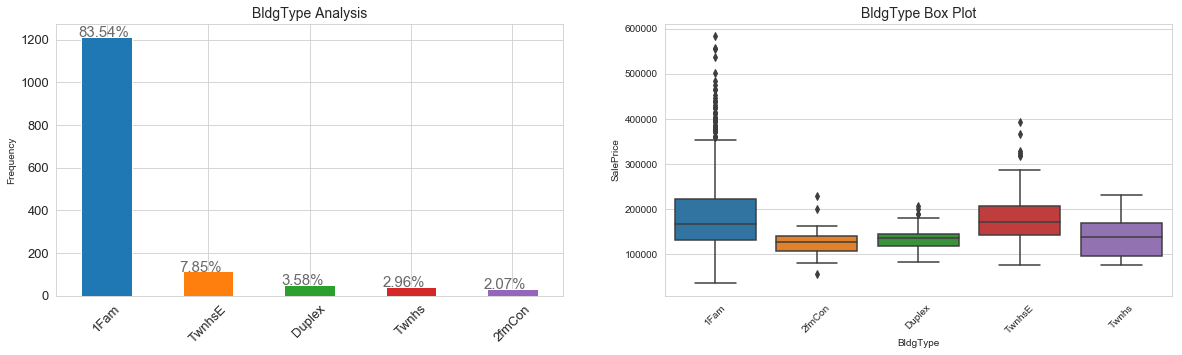

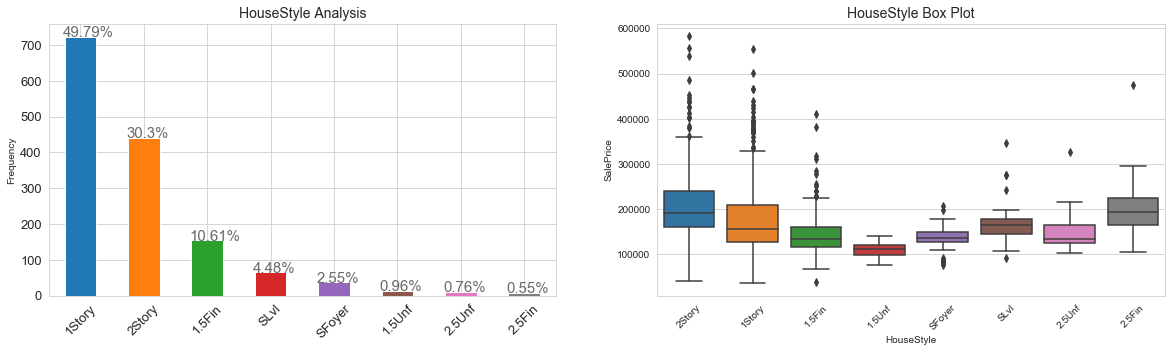

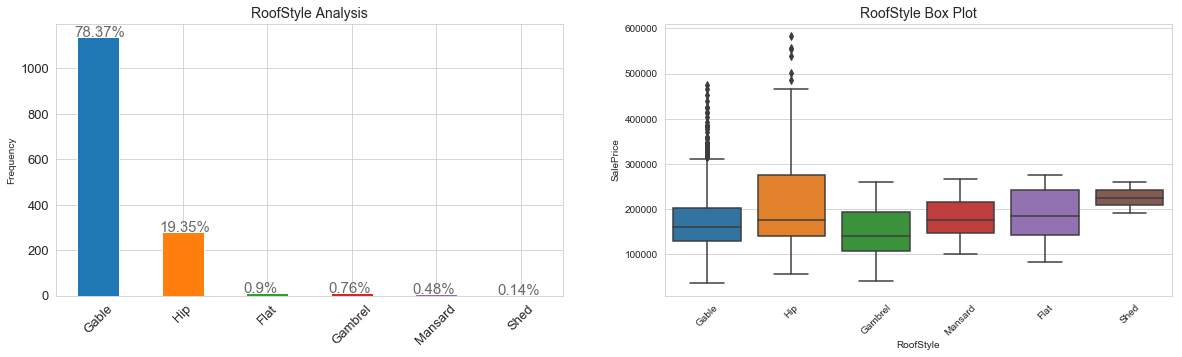

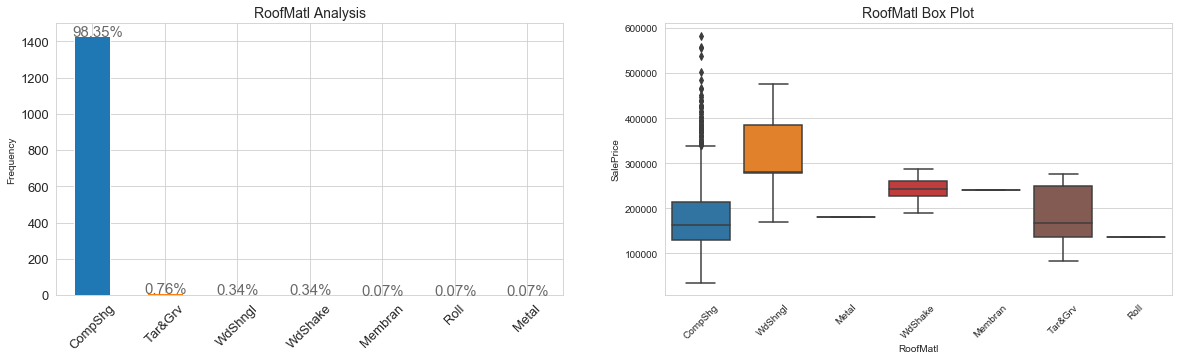

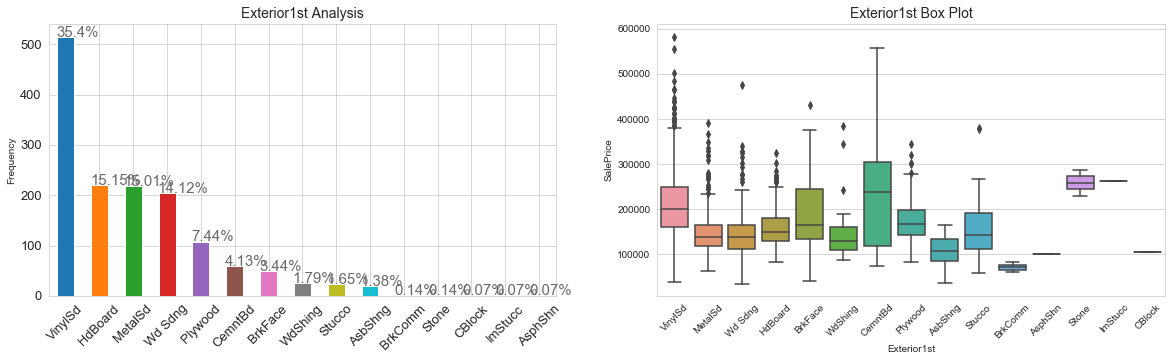

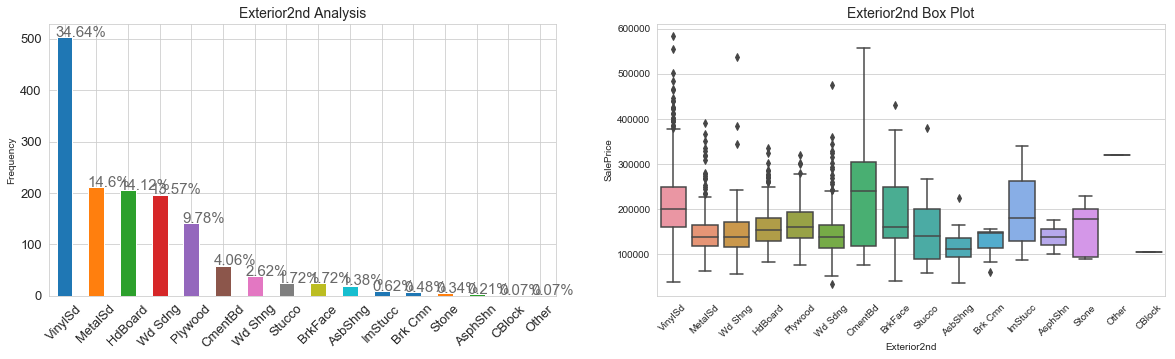

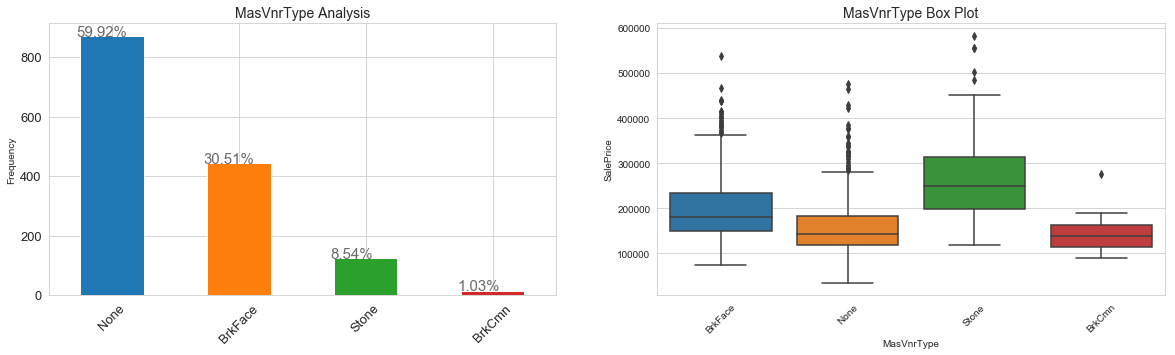

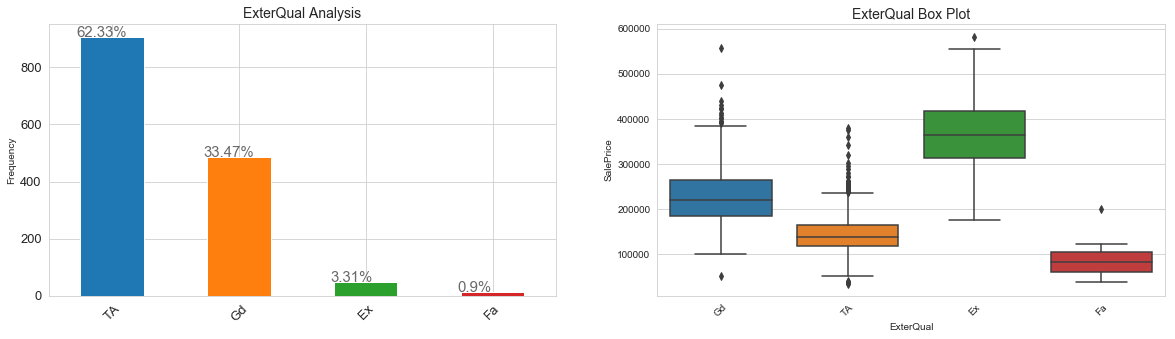

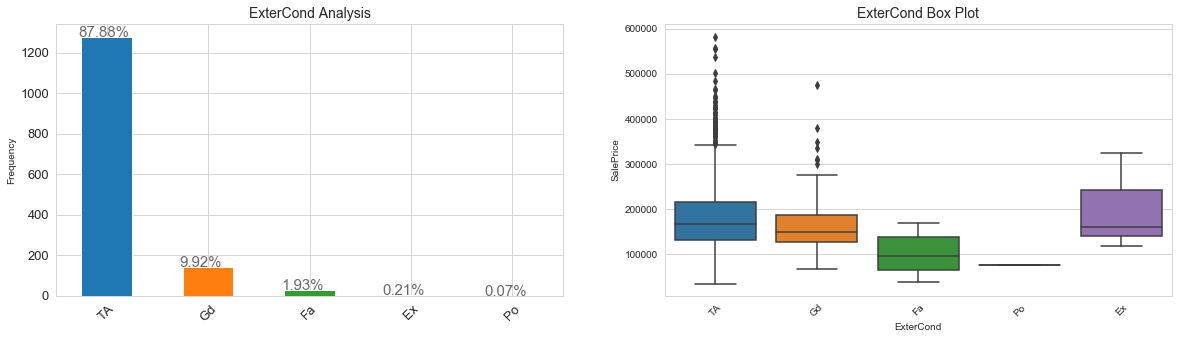

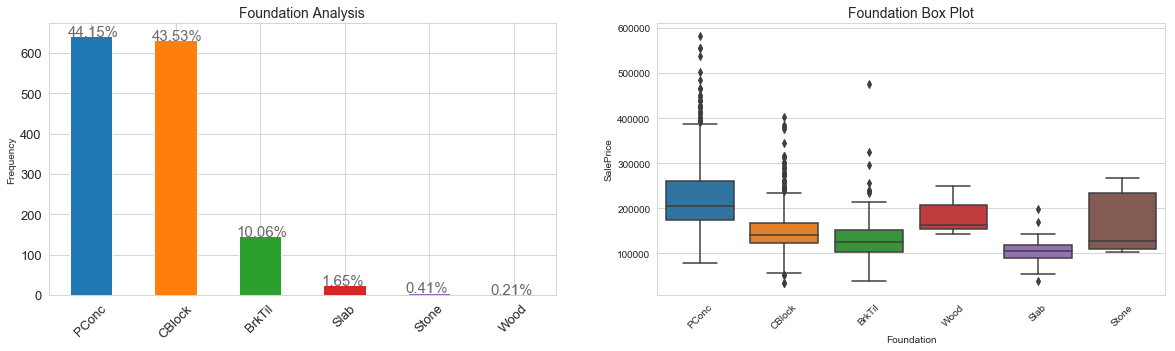

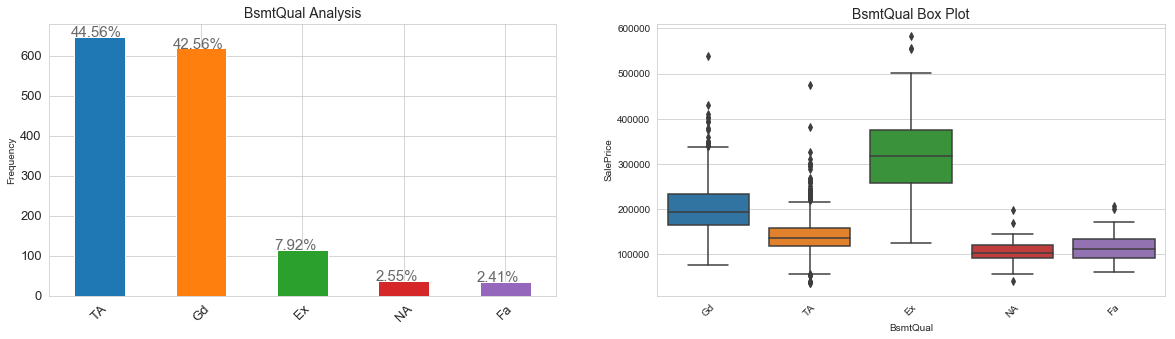

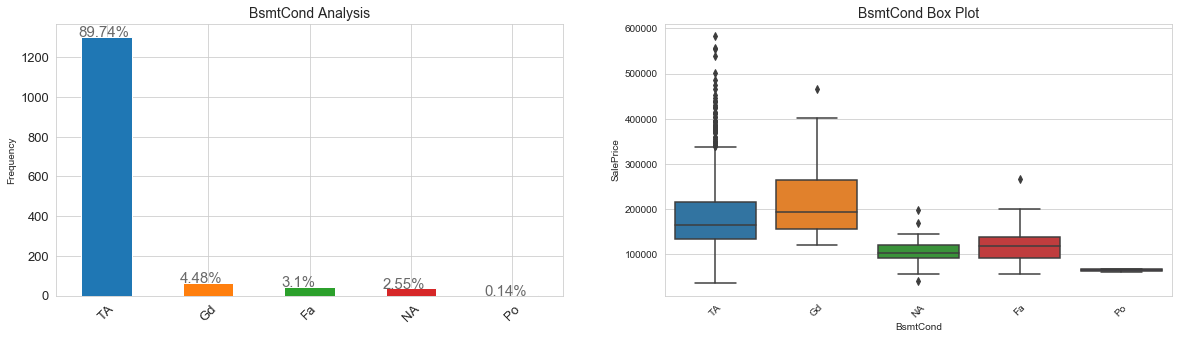

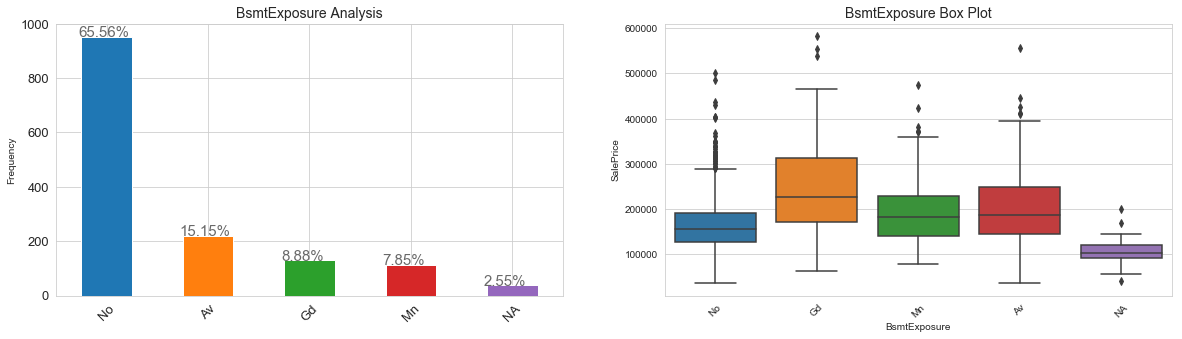

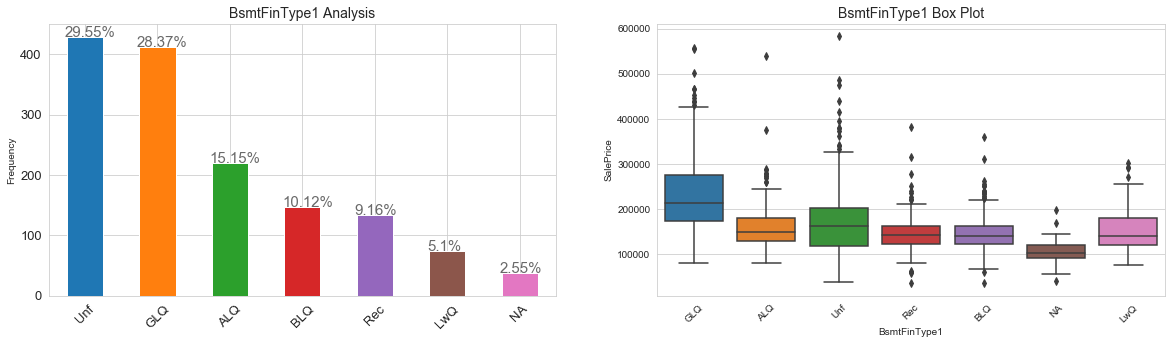

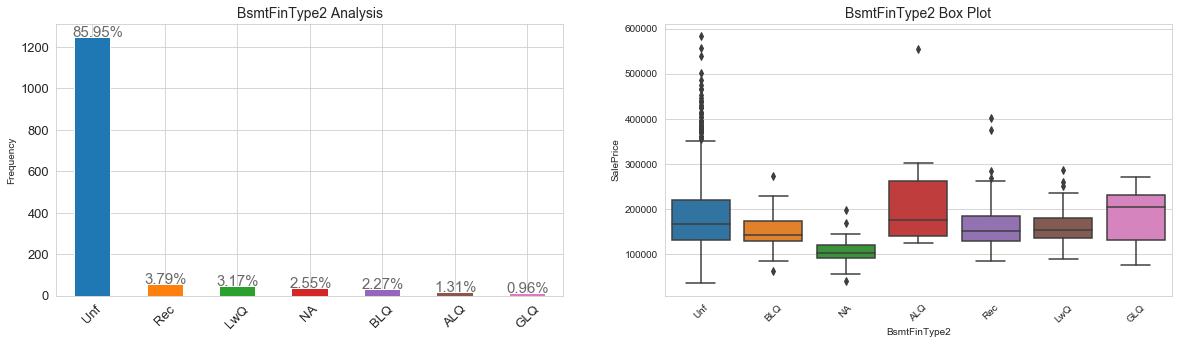

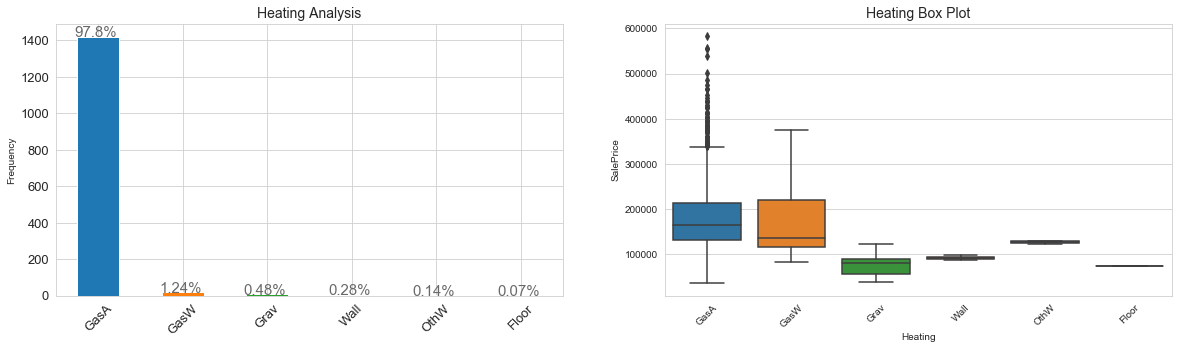

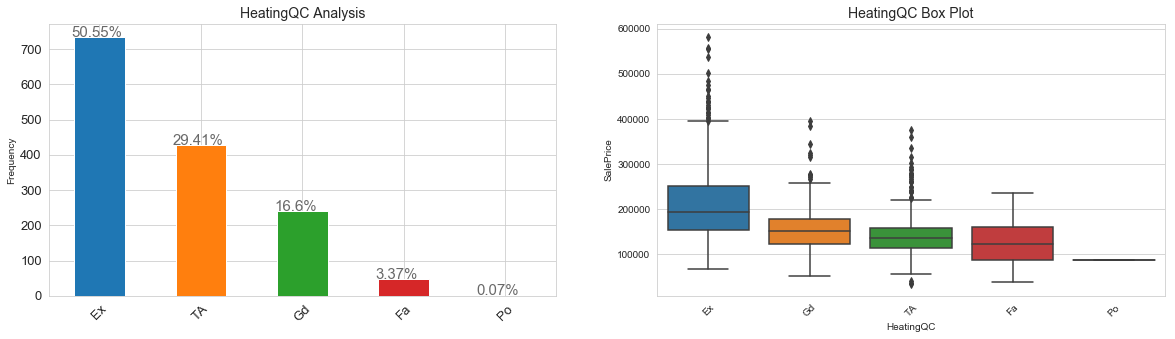

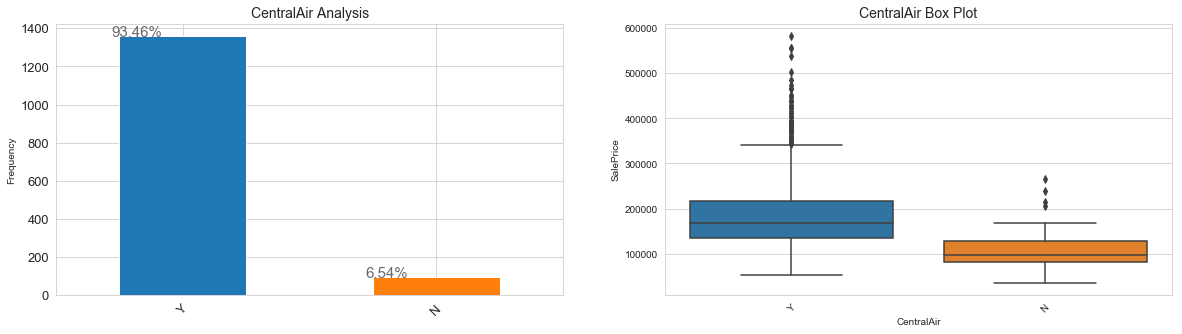

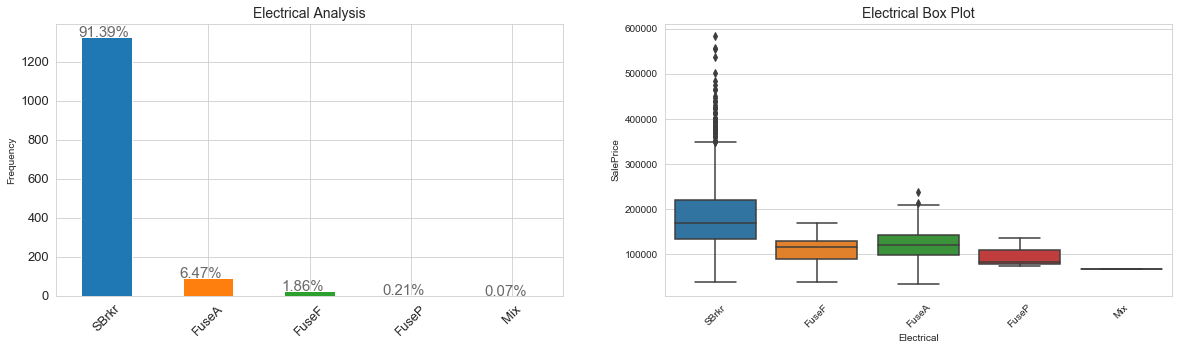

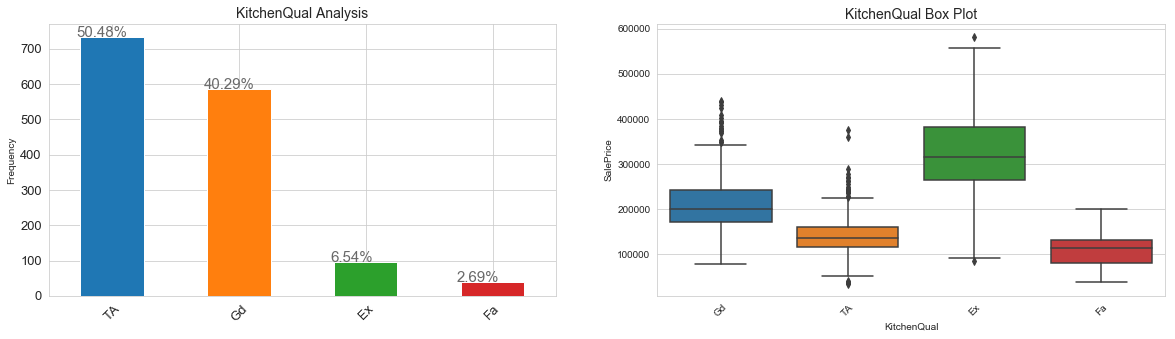

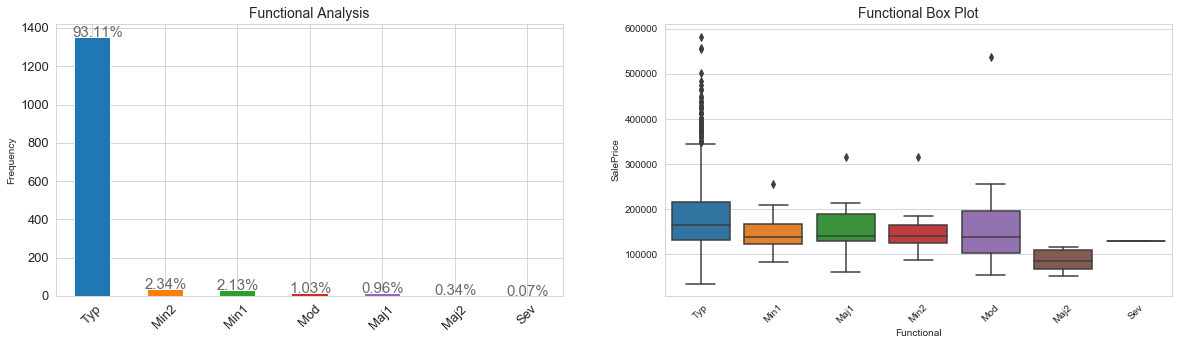

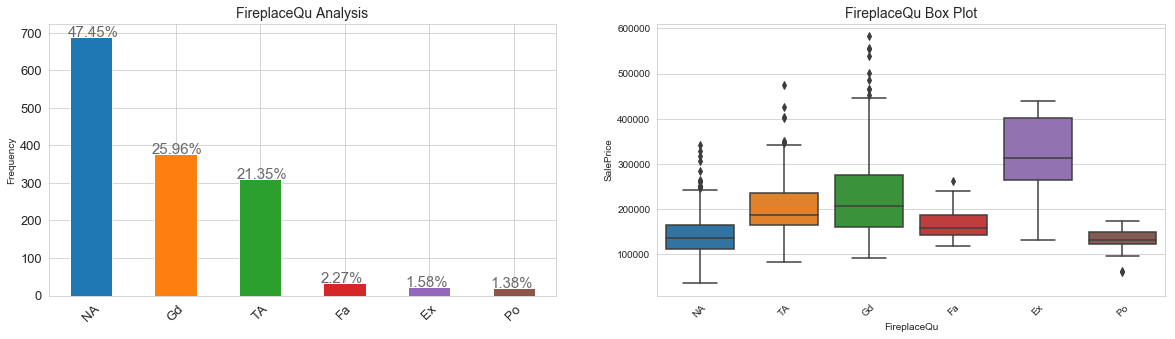

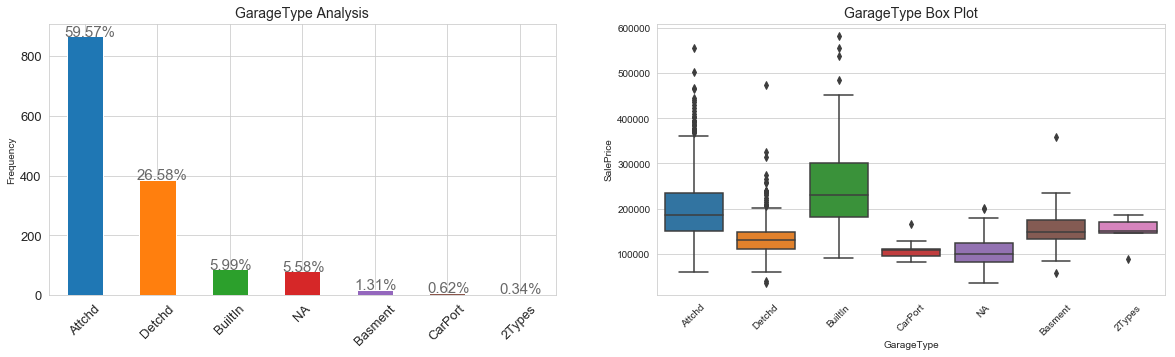

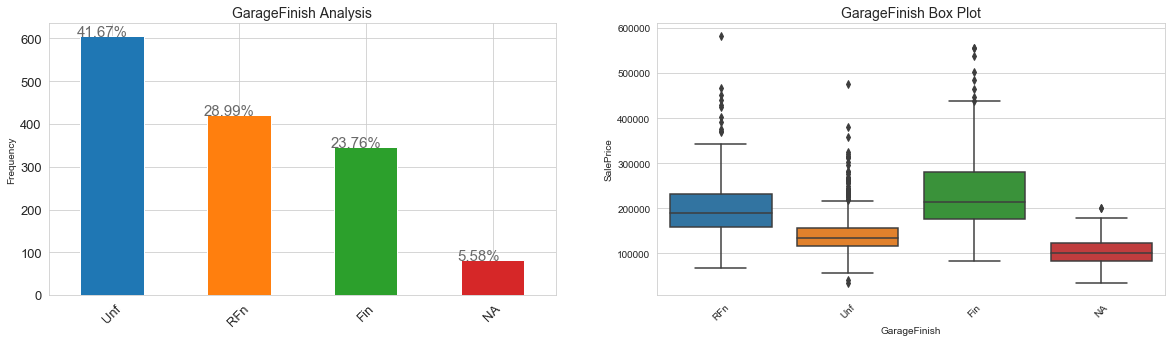

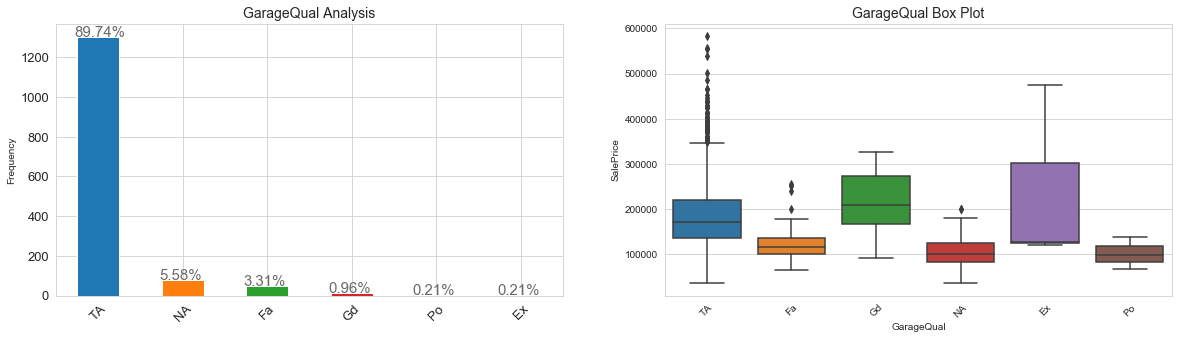

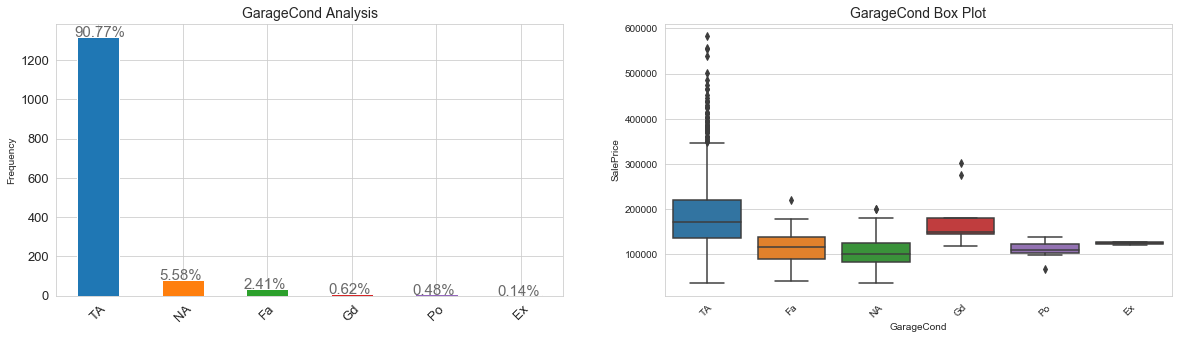

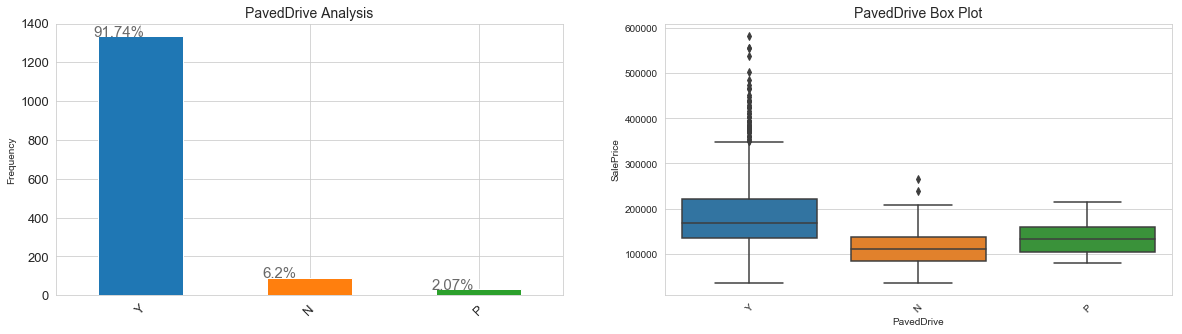

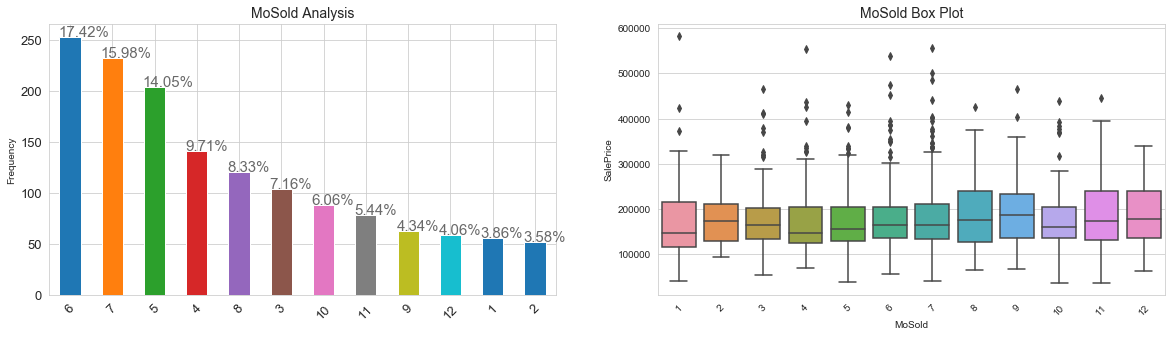

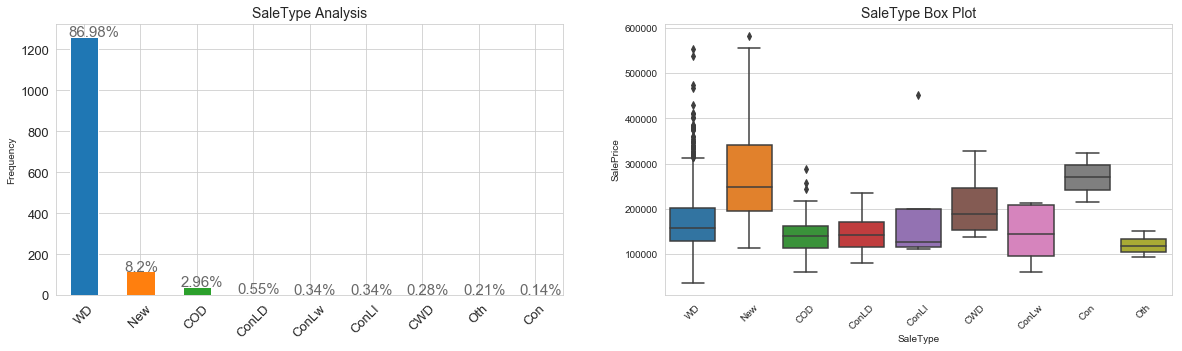

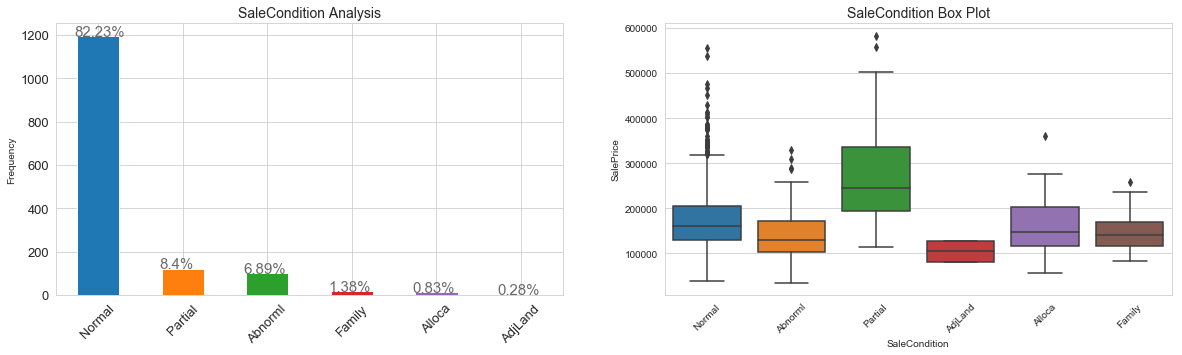

In [51]:
# Bar plot and box plot for categorical variables
for col in col_cat:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    
    ax = train[col].value_counts().plot(kind='bar', fontsize=13)
    ax.set_alpha(0.8)
    ax.set_title(col+" Analysis", fontsize=14)
    ax.set_ylabel("Frequency");

    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()-.03, i.get_height()+.5, str(round((i.get_height()/total)*100, 2))+'%', fontsize=15, color='dimgrey')
    
    plt.xticks(rotation=45)
    plt.subplot(122)
    plt.title(col + " Box Plot", fontsize=14)
    sns.boxplot(x=col, y='SalePrice',  data=train)
    plt.xticks(rotation=45)
    plt.show()

### <font color=red>Observation -</font>
    Variable - MSZoning
    We have outliers for Resident Low Density and Resident Medium Density
    Maximum property have Resident Low Density

    Variable - LotShape
    We have outliers for Reg, R1 ad R2
    Maximum property have Regular shape

    Variable - LandContour
    We have outliers for Lvl
    Close to 90% of properties have Near Flat/Level flatness of property

    Variable - LotConfig
    Maximum number of properties have Inside Lot
    Except properties of frontage on 3 sides of property have outliers

    Variable - LandSlope
    Maximum properties have Gentle Slope and also outliers

    Variable - Neighborhood
    Maximum properties are in location North Ames

    Variable - Condition1, Condition2
    Maximum properties have normal condition

    Variable - BldgType
    Maximum number of properties have value 1Fam which states Single-family Detached

    Variable - HouseStyle
    Close to 50% of properties have 1 story
    Median price range of houses are comparable

    Variable - RoofStyle, RoofMatl
    Maximum properties have Gable roof and roof material as Standard (Composite) Shingle

    Variable - Exterior1st, Exterior2nd
    Maximum properties have exterior covering of house as Vinyl Siding

    Variable - MasVnrType
    More than 50% of properties have Masonry Veneer Type as None

    Variable - ExterQual, ExterCond
    Maximum properties have material as Average/Typical

    Variable - Foundation
    Maximum properties have foundation of Poured Contrete and Cinder Block, less than 1% have stone and wood

    Variable - BsmtQual
    Maximum properties have height of basement from 80-99 inches, moe than 100 inches of height basement properties are expensive

    Variable - BsmtCond
    Maximum properties have Typical condition which is slight dampness allowed

    Variable - BsmtExposure
    Most of the properties do not have any exposure in basement. Properties with good exposure are slightly more expensive

    Variable - BsmtFinType1, BsmtFinType2
    Basement Type1 of majority of properties are either unfinished or good living quarters. Does not impact price much

    Variable - Heating
    More than 95% of properties have Gas forced warm air furnace, and same have maximum number of outliers. Gas heating median property prices are more than other types.

    Variable - HeatingQC
    Heating condition is excellent for majority of properties, does not impact price of property much.

    Variable - CentralAir
    Almost all properties have central air conditioning, median price of properties with central air conditioning slightly higher than the properties which do not have.

    Variable - Electrical
    Standard Circuit Breakers & Romex is the electrical system in majority of properties. This variable does not seem to impact price of property

    Variable - KitchenQual
    Majority of properties have Typical Kitchen followed by Good. Maximum median price of Kitchen is with excellent condition.

    Variable - Functional
    Majority of properties have Home Functionality have typical functionality, while median price of all home functionality is comparable.

    Variable - FireplaceQu
    Nearly half of properties have no fireplace, fireplace in a property has positive affect on price.

    Variable - GarageType, GarageFinish, GarageQual, GarageCond
    Garage and any of its related attribute does not show any serious impact on price of property.

    Variable - PavedDrive
    Majority of properties have PavedDrive but does not show any correlation with Property Price

    Variable - YrSold, MoSold, SaleType, SaleCondition
    No correlation with price
### <font color=red>=========================================================================================</font>

### Data Preparation

#### Split into X and y dataset

In [52]:
y = train.pop('SalePrice')
X = train

In [53]:
print(X.shape)
print(y.shape)

(1452, 73)
(1452,)


#### Dummy Variables

In [54]:
# Encoding categorical variables
X = pd.concat([X, pd.get_dummies(X.loc[:,col_cat], prefix=col_cat, drop_first=True)], axis = 1)

In [55]:
# Deleting original variables
X.drop(col_cat, axis = 1, inplace = True)

In [56]:
print(train.shape)
X.head()

(1452, 73)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


#### Scaling features

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[col_num] = scaler.fit_transform(X[col_num])

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.12250,0.370798,0.0,0.064212,0.266999,...,0,0,0,0,1,0,0,0,1,0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.00000,0.513655,0.0,0.121575,0.393637,...,0,0,0,0,1,0,0,0,1,0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.10125,0.255252,0.0,0.185788,0.286962,...,0,0,0,0,1,0,0,0,1,0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.00000,0.113445,0.0,0.231164,0.235808,...,0,0,0,0,1,0,0,0,0,0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.21875,0.344013,0.0,0.209760,0.357143,...,0,0,0,0,1,0,0,0,1,0


#### Splitting the Data into Training and Testing Sets

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=50)

# Dataset for Lasso
X_train_lasso = X_train.copy()
y_train_lasso = y_train.copy()
X_test_lasso = X_test.copy()
y_test_lasso = y_test.copy()

# Dataset for Ridge
X_train_ridge = X_train.copy()
y_train_ridge = y_train.copy()
X_test_ridge = X_test.copy()
y_test_ridge = y_test.copy()

### Model Building and Evaluation

#### Lasso Regresssion

In [59]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
# getting folds 5
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_lasso, y_train_lasso) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   16.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [60]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.143017,0.010337,0.001396,4.884026e-04,0.0001,{'alpha': 0.0001},-18453.832641,-16680.503908,-16575.051912,-16967.704711,...,-17219.767473,683.592243,22,-10842.051225,-11609.600979,-11400.718623,-10952.717896,-11009.416456,-11162.901036,292.156504
1,0.147405,0.006414,0.001199,3.984614e-04,0.001,{'alpha': 0.001},-18453.603833,-16687.027362,-16574.950339,-16967.667400,...,-17220.946751,682.492863,23,-10842.046778,-11609.613362,-11400.710993,-10952.743047,-11009.441478,-11162.911131,292.153778
2,0.148202,0.005724,0.000992,1.087502e-05,0.01,{'alpha': 0.01},-18451.294523,-16752.264281,-16573.933729,-16967.294239,...,-17232.739531,671.977680,25,-10842.143602,-11609.839837,-11400.779197,-10953.025209,-11009.736852,-11163.104940,292.141255
3,0.148802,0.007812,0.000997,8.313940e-07,0.05,{'alpha': 0.05},-18440.486057,-16793.770705,-16568.748230,-16965.592017,...,-17235.264958,662.897385,26,-10843.306377,-11610.882385,-11401.352524,-10954.361009,-11011.259218,-11164.232303,291.946046
4,0.175132,0.050825,0.001197,7.464294e-04,0.1,{'alpha': 0.1},-18427.101873,-16782.081553,-16562.151859,-16963.608161,...,-17225.707401,660.355983,24,-10844.818132,-11612.177303,-11401.923732,-10956.137765,-11013.083629,-11165.628112,291.656259


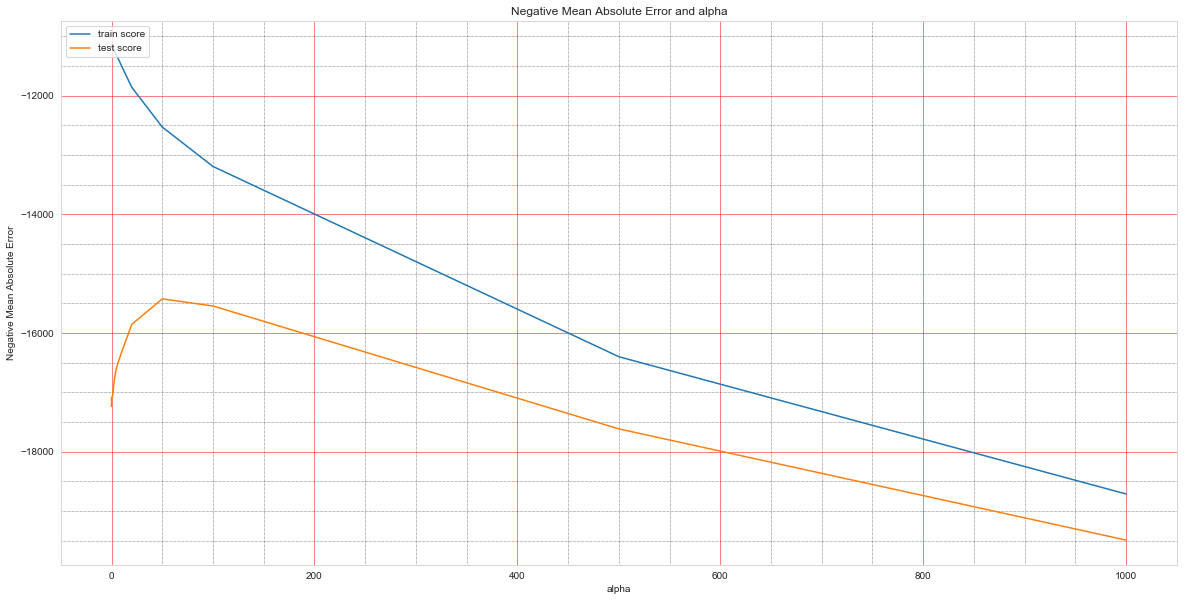

In [61]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(20,10))

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### <font color=red>Observation -</font>
    We see Negative Mean Absolute Error for test increases to alpha = 50 and decreases post that, hence we will consider alpha = 50 for Lasso Regression

In [62]:
alpha = 50
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_lasso, y_train_lasso)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
# predict using Lasso Model
y_train_lasso_pred = lasso.predict(X_train_lasso)
print(r2_score(y_true=y_train_lasso, y_pred=y_train_lasso_pred))
y_test_lasso_pred = lasso.predict(X_test_lasso)
print(r2_score(y_true=y_test_lasso, y_pred=y_test_lasso_pred))

0.937245301585828
0.90918437508752


In [64]:
lasso.coef_

array([-1.70511606e+04,  0.00000000e+00,  8.27342452e+04,  7.33524629e+04,
        3.43543763e+04,  1.03480358e+04,  3.41046894e+04,  1.09842786e+04,
       -0.00000000e+00,  5.75864806e+04,  0.00000000e+00,  9.15726030e+03,
       -1.69974072e+04,  1.50853967e+05,  5.40457947e+03, -3.62777183e+03,
        2.51541420e+03,  2.71176081e+03, -9.89122924e+03, -1.67307286e+04,
        1.56313614e+04,  5.61930085e+03,  1.06479776e+04,  2.62965620e+04,
        1.03576426e+04,  6.22165041e+03, -0.00000000e+00,  9.30522295e+03,
        9.05227945e+03,  0.00000000e+00, -0.00000000e+00, -2.61996398e+04,
       -1.10859928e+04, -2.55739392e+03,  0.00000000e+00,  7.05198102e+03,
        0.00000000e+00,  4.10876382e+03, -0.00000000e+00,  7.53291197e+03,
        0.00000000e+00,  2.47601826e+03,  5.41906461e+03, -3.99232155e+03,
        0.00000000e+00,  8.55155919e+03, -2.10319785e+03, -0.00000000e+00,
       -0.00000000e+00,  1.99659793e+03, -1.00765682e+04, -0.00000000e+00,
        3.56026278e+03,  

In [65]:
# Model parameters for Lasso model
model_parameters_lasso = list(lasso.coef_)
model_parameters_lasso.insert(0, lasso.intercept_)
model_parameters_lasso = [round(x, 3) for x in model_parameters_lasso]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_lasso))

[('constant', 54905.193),
 ('MSSubClass', -17051.161),
 ('LotFrontage', 0.0),
 ('LotArea', 82734.245),
 ('OverallQual', 73352.463),
 ('OverallCond', 34354.376),
 ('MasVnrArea', 10348.036),
 ('BsmtFinSF1', 34104.689),
 ('BsmtFinSF2', 10984.279),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 57586.481),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 9157.26),
 ('LowQualFinSF', -16997.407),
 ('GrLivArea', 150853.967),
 ('BsmtFullBath', 5404.579),
 ('BsmtHalfBath', -3627.772),
 ('FullBath', 2515.414),
 ('HalfBath', 2711.761),
 ('BedroomAbvGr', -9891.229),
 ('KitchenAbvGr', -16730.729),
 ('TotRmsAbvGrd', 15631.361),
 ('Fireplaces', 5619.301),
 ('GarageCars', 10647.978),
 ('GarageArea', 26296.562),
 ('WoodDeckSF', 10357.643),
 ('OpenPorchSF', 6221.65),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 9305.223),
 ('ScreenPorch', 9052.279),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('PropAge', -26199.64),
 ('RemodAge', -11085.993),
 ('GarageAge', -2557.394),
 ('SoldAge', 0.0),
 ('MSZoning_FV', 7051.981),
 ('MSZoning_RH', 

In [66]:
# Columns with non-zero coefficient in Lasso model
df_lasso_coef = pd.DataFrame(list(zip(cols, model_parameters_lasso)))

# updating column name
df_lasso_coef.columns = ['Column Name', 'Lasso Coefficient']

col_lasso = list(df_lasso_coef[df_lasso_coef['Lasso Coefficient']!=0]['Column Name'])

# removing constant
col_lasso.remove('constant')
col_lasso

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 '3SsnPorch',
 'ScreenPorch',
 'PropAge',
 'RemodAge',
 'GarageAge',
 'MSZoning_FV',
 'MSZoning_RL',
 'LotShape_IR2',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Nei

#### Ridge Regresssion

In [67]:
# Ridge dataset with lasso non-zero coefficient columns
X_train_ridge = X_train_ridge[col_lasso]
X_test_ridge = X_test_ridge[col_lasso]

In [68]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
# getting folds 5
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_ridge, y_train_ridge) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [69]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002992,0.001093,0.000998,5.001110e-07,0.0001,{'alpha': 0.0001},-15439.159876,-13838.040178,-15034.479958,-15499.472065,...,-15253.162591,846.604255,18,-12451.708208,-12831.108378,-12527.863050,-12245.993902,-12079.574520,-12427.249611,255.951086
1,0.002593,0.000798,0.000798,3.989459e-04,0.001,{'alpha': 0.001},-15438.407608,-13837.114426,-15033.669471,-15498.065381,...,-15252.514485,847.026124,17,-12451.623387,-12830.942751,-12527.697991,-12245.619475,-12079.308544,-12427.038430,256.009523
2,0.003391,0.000489,0.000798,3.990415e-04,0.01,{'alpha': 0.01},-15430.904138,-13827.937841,-15025.605824,-15484.171462,...,-15246.099760,851.250600,16,-12450.873795,-12829.476147,-12526.045412,-12241.903216,-12076.707548,-12425.001224,256.636960
3,0.003391,0.000798,0.000997,6.641573e-07,0.05,{'alpha': 0.05},-15399.652624,-13788.790860,-14990.644562,-15426.575342,...,-15219.837137,870.854590,14,-12448.383422,-12823.733331,-12518.994184,-12231.625038,-12067.128389,-12417.972873,258.297899
4,0.002992,0.000630,0.000598,4.886166e-04,0.1,{'alpha': 0.1},-15362.532342,-13748.378792,-14948.888079,-15365.125292,...,-15191.084095,893.053276,13,-12446.458428,-12820.317882,-12513.388481,-12235.921078,-12056.207654,-12414.458704,259.134040


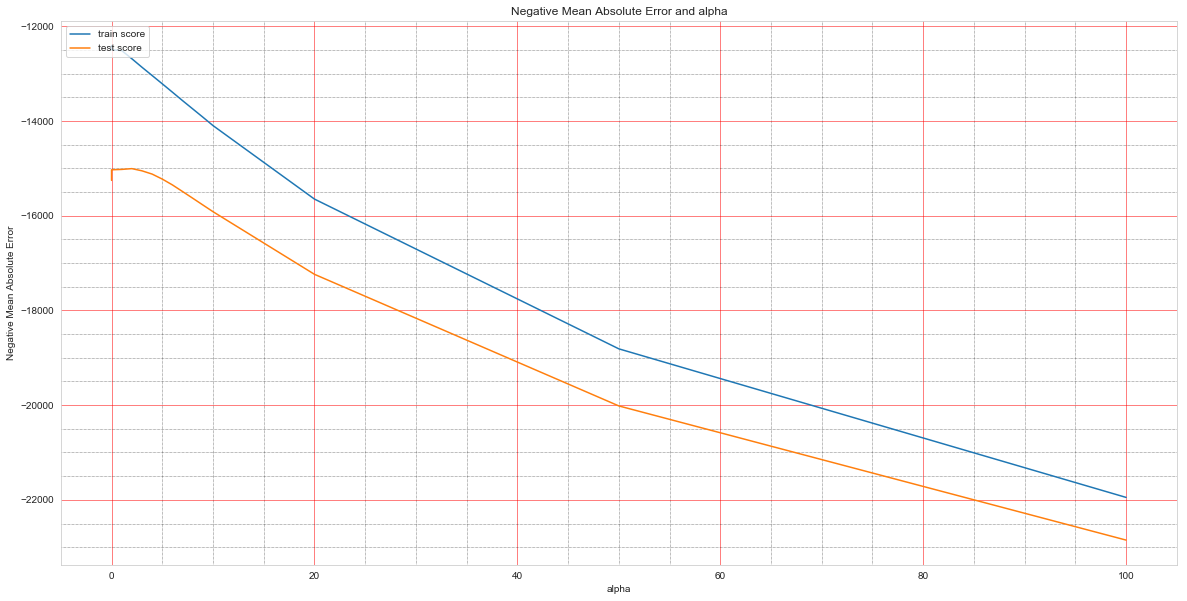

In [70]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(20,10))

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### <font color=red>Observation -</font>
    We see Negative Mean Absolute Error for test decreases after alpha = 2, hence we will consider alpha = 2 for Ridge Regression

In [71]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_ridge, y_train_ridge)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
# predict using Ridge Model
y_train_ridge_pred = ridge.predict(X_train_ridge)
print(r2_score(y_true=y_train_ridge, y_pred=y_train_ridge_pred))
y_test_ridge_pred = ridge.predict(X_test_ridge)
print(r2_score(y_true=y_test_ridge, y_pred=y_test_ridge_pred))

0.9370022091537757
0.9026248283363133


In [73]:
ridge.coef_

array([-16273.80724785,  49727.62268828,  62599.05490953,  30954.97710265,
        16857.14977914,  33632.37056908,  15291.17502778,  66271.53602679,
        21396.49109297, -12501.02852227,  92761.4857623 ,   6641.09009358,
        -6165.10280421,  15431.50412738,   4701.46835977, -11519.06591679,
       -18004.30465115,  35323.4768508 ,  13249.81576232,  14998.58064824,
        28117.93793308,  12855.57121266,  11281.45588941,  18574.5797919 ,
        11127.95966594, -16803.13090974, -12384.24100806,   1144.3717354 ,
         7121.60613112,   3603.57509606,  10375.80577739,   2921.65374344,
         7095.41061176,  -5762.54614771,  10202.36500494,  -4658.24273839,
         4006.84075079,  -5572.28813741,   7878.08194903,   1790.48178235,
        -6149.45794504,  18006.59843108, -10523.63962383,  -8462.75182273,
        -9608.27255062,  -8606.0386093 ,  -6428.93059712,  -5233.90088594,
        25706.2505003 ,  15773.46576649,  -6664.44247894,  -4669.77250853,
          469.05787678,  

In [74]:
# Model parameters for Ridge model
model_parameters_ridge = list(ridge.coef_)
model_parameters_ridge.insert(0, ridge.intercept_)
model_parameters_ridge = [round(x, 3) for x in model_parameters_ridge]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_ridge))

[('constant', 65050.14),
 ('MSSubClass', -16273.807),
 ('LotFrontage', 49727.623),
 ('LotArea', 62599.055),
 ('OverallQual', 30954.977),
 ('OverallCond', 16857.15),
 ('MasVnrArea', 33632.371),
 ('BsmtFinSF1', 15291.175),
 ('BsmtFinSF2', 66271.536),
 ('BsmtUnfSF', 21396.491),
 ('TotalBsmtSF', -12501.029),
 ('1stFlrSF', 92761.486),
 ('2ndFlrSF', 6641.09),
 ('LowQualFinSF', -6165.103),
 ('GrLivArea', 15431.504),
 ('BsmtFullBath', 4701.468),
 ('BsmtHalfBath', -11519.066),
 ('FullBath', -18004.305),
 ('HalfBath', 35323.477),
 ('BedroomAbvGr', 13249.816),
 ('KitchenAbvGr', 14998.581),
 ('TotRmsAbvGrd', 28117.938),
 ('Fireplaces', 12855.571),
 ('GarageCars', 11281.456),
 ('GarageArea', 18574.58),
 ('WoodDeckSF', 11127.96),
 ('OpenPorchSF', -16803.131),
 ('EnclosedPorch', -12384.241),
 ('3SsnPorch', 1144.372),
 ('ScreenPorch', 7121.606),
 ('PoolArea', 3603.575),
 ('MiscVal', 10375.806),
 ('PropAge', 2921.654),
 ('RemodAge', 7095.411),
 ('GarageAge', -5762.546),
 ('SoldAge', 10202.365),
 ('MSZo

### Model Evaluation

In [75]:
# Comparing R2 score for lasso and ridge model
print("Lasso Model")
print("R2 score on train : ",r2_score(y_true=y_train_lasso, y_pred=y_train_lasso_pred))
print("R2 score on test : ",r2_score(y_true=y_test_lasso, y_pred=y_test_lasso_pred))

print("Ridge Model")
print("R2 score on train : ",r2_score(y_true=y_train_ridge, y_pred=y_train_ridge_pred))
print("R2 score on test : ",r2_score(y_true=y_test_ridge, y_pred=y_test_ridge_pred))

Lasso Model
R2 score on train :  0.937245301585828
R2 score on test :  0.90918437508752
Ridge Model
R2 score on train :  0.9370022091537757
R2 score on test :  0.9026248283363133


### <font color=red>Observation -</font>
    From above R2 scores of both the models looks comparable but still Lasso performs slightly better than Ridge and we will be considering the same for price estimation. Lasso performs better on Test dataset and difference performance on Train and Test dataset is also better in Lasso.

### Top 10 columns which are highly positive correlated with SalePrice
    Increase in these will refer increase in price of property

In [76]:
df_lasso_coef.sort_values('Lasso Coefficient', ascending=False).head(10)

,Column Name,Lasso Coefficient
14,GrLivArea,150853.967
3,LotArea,82734.245
4,OverallQual,73352.463
10,TotalBsmtSF,57586.481
0,constant,54905.193
73,Neighborhood_StoneBr,39150.093
5,OverallCond,34354.376
7,BsmtFinSF1,34104.689
24,GarageArea,26296.562
66,Neighborhood_NoRidge,24558.945


### Top 10 columns which are highly negative correlated with SalePrice
    Increase in this will refer to decrease in price of property

In [77]:
df_lasso_coef.sort_values('Lasso Coefficient', ascending=True).head(10)

,Column Name,Lasso Coefficient
147,ExterQual_TA,-32218.684
146,ExterQual_Gd,-30467.776
32,PropAge,-26199.640
195,KitchenQual_Fa,-19787.904
145,ExterQual_Fa,-19107.569
196,KitchenQual_Gd,-17481.154
197,KitchenQual_TA,-17330.839
1,MSSubClass,-17051.161
13,LowQualFinSF,-16997.407
20,KitchenAbvGr,-16730.729


In [78]:
# Lasso Model Parameters - All
df_lasso_coef.sort_values('Lasso Coefficient', ascending=False)

,Column Name,Lasso Coefficient
14,GrLivArea,150853.967
3,LotArea,82734.245
4,OverallQual,73352.463
10,TotalBsmtSF,57586.481
0,constant,54905.193
73,Neighborhood_StoneBr,39150.093
5,OverallCond,34354.376
7,BsmtFinSF1,34104.689
24,GarageArea,26296.562
66,Neighborhood_NoRidge,24558.945
